# I. Set Up

In [1]:
# PYTHON Imports 
import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
import math
import statistics
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from mpl_toolkits.mplot3d import Axes3D
from pathlib import Path
import glob
import os
import ipywidgets as widgets
from IPython.display import clear_output
import sys
import time
import json
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
import umap
import seaborn as sns
import fnmatch
# ASTROPHY Imports
import astropy 
from astropy.table import Table
from astropy.io import fits
from sherpa.astro import ui
# CIAO Imports
import ciao_contrib.runtool
from ciao_contrib.runtool import *
# CUSTOM Imports
from data_extraction_functions import *
from data_exploration_functions import *
from data_representation_functions import *

# Specify global path
global_path = '/Users/steven/Library/Mobile Documents/com~apple~CloudDocs/0-CfA/4-Data/Datasets'
global_folders = list_folders_fun(global_path)

# Custom object hook to convert lists of lists to NumPy arrays
def numpy_hook(obj):
    if isinstance(obj, list):
        # Check if the list contains sublists (i.e. a matrix)
        if isinstance(obj[0], list):
            # Convert the list of lists to a NumPy array matrix
            return np.array(obj)
    # Return all other objects as is
    return obj

# Select dataset
set_widget = widgets.Dropdown(options=global_folders[:],value=global_folders[0],description='Set :',disabled=False); set_widget

2023-04-25 22:59:41.515910: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Dropdown(description='Set :', options=('Full', 'All', 'New', 'Bona'), value='Full')

# II. Load Data

In [2]:
# Set ID
set_id = set_widget.value
files = os.listdir(f'{global_path}/{set_id}/')
input_files = [f for f in files if fnmatch.fnmatch(f, 'hist*nE16*.pkl')]
input_widget = widgets.Dropdown(options=input_files[:],value=input_files[0],description='Histogram File :',disabled=False); input_widget

Dropdown(description='Histogram File :', options=('hist2D-Full-nE16-nt24-normZ.pkl', 'hist2D-Full-nE16-nt24-no…

In [3]:
# Load the DataFrame from the CSV file
input_file = input_widget.value
# Load histogram dictionary
with open(f'{global_path}/{set_id}/{input_file}', 'rb') as f:
    hist_dict = pickle.load(f)
# Flatten histograms in the dictionary and get IDs
ids = hist_dict.keys()
histograms = hist_dict.values()
features = np.array([np.array(h).flatten() for h in histograms])
features[np.isnan(features)] = 0.0
# Load properties
df_properties_input = pd.read_csv(f'{global_path}/{set_id}/properties-input-{set_id}.csv')
df_properties_input = df_properties_input[df_properties_input['obsreg_id'].isin(list(ids))]
df_properties = df_properties_input.drop_duplicates('obsreg_id', keep='first').reset_index()
#Load eventfiles
df_eventfiles_input = pd.read_csv(f'{global_path}/{set_id}/eventfiles-input-{set_id}.csv')
df_properties_global = pd.read_csv(f'{global_path}/{set_id}/properties-{set_id}.csv')
df_properties_global['obsreg_id'] = df_properties_global['obsid'].astype(str) + '_' + df_properties_global['region_id'].astype(str)
df_eventfiles_group = df_eventfiles_input.groupby('obsreg_id')
df_properties_group = df_properties_input.groupby('obsreg_id')

# print("Number of Eventfiles: ", df_eventfiles_group.ngroups)
# print("Number of Property Sets: ", df_properties_group.ngroups)

# Print eventfiles and properties number of IDs
print("Number of Features: ", len(features))
print("Number of Property Sets: ", len(df_properties))

Number of Features:  95473
Number of Property Sets:  95473


# III. Display

SHOW

In [4]:
# Load DBSCAN RESULT
files = os.listdir(f'{global_path}/{set_id}/')
dbscan_files = [f for f in files if fnmatch.fnmatch(f, 'DBSCANres*11*csv')]
dbscan_widget = widgets.Dropdown(options=dbscan_files[:],value=dbscan_files[0],description='TSNE File :',disabled=False); dbscan_widget

Dropdown(description='TSNE File :', options=('DBSCANres-Full-tsne-Full-hist3D-Full-nE16-nt24-ndt16-normnone-2D…

In [5]:
# Load the DataFrame from the CSV file
dbscan_file = dbscan_widget.value
df_tsne_filter = pd.read_csv(f'{global_path}/{set_id}/{dbscan_file}')
df_tsne_filter = df_tsne_filter.sort_values(by='cluster', ascending=True) 

#####SELECTED ANOMALIES
dip_in_blip = ['14431_16']
dips_select = ['10783_10','10871_10','11059_10','9070_10','9072_10','11272_13','10783_10','13682_9','1708_192','1708_193','1712_91','15553_237','13681_9','13813_86','11988_38','13814_586','13812_586','13828_596','13828_46']
dips_maybe = ['12992_101','12995_101','13814_586','13813_218','13814_237','13828_596']
flares_select = ['10542_331','4395_992','2227_220','16444_1025','14368_503','14431_16','14542_18','10822_185','10955_21','10996_5','2833_53','13610_112','15214_29','9109_333','9109_344','13637_1078','14368_489','1042_24','11016_168','11737_157','12390_136']
flares_maybe = ['10542_331','10556_6687','10556_5752','10556_6687']
rosanne = ['13814_567']
ieva = ['11272_13','13812_586','13812_218','9550_17','942_101','6152_79']
caleb = ['13812_86','13813_86','793_107','808_47','4733_229','4736_81','4737_74','5322_229'] #,'4737_21','934_23','5309_17']
caleb_flares = ['1586_59','9533_24']
lin = ['4062_31', '13454_56','20635_58'] # last one not clustered... 
irwin = ['3926_13','7800_4','7799_16','8490_30']
xue = ['957_208', '3389_274']
goulding_nandra = ['9875_166', '9456_274', '5849_62', '8636_2', '8636_3'] # last one not listed, first one maybe not
# civian_marchesi = ['8021_33']  bad
not_liste_xue = ['15211_44', '15211_3']


tsne_flares = df_tsne_filter.loc[df_tsne_filter['obsreg_id'].isin(flares_select+flares_maybe)]
tsne_dips = df_tsne_filter.loc[df_tsne_filter['obsreg_id'].isin(dips_select + dips_maybe)]
tsne_rosanne = df_tsne_filter.loc[df_tsne_filter['obsreg_id'].isin(rosanne + ieva )]
tsne_lin_irwin = df_tsne_filter.loc[df_tsne_filter['obsreg_id'].isin(lin + irwin + xue + goulding_nandra )]

anomalies = pd.concat([tsne_flares, tsne_dips, tsne_rosanne, tsne_lin_irwin])
anomalies.head(50)

tsne1      tsne2  obsreg_id  cluster
1075  -33.032936  -1.799408    1042_24       -1
3806  -60.675160 -33.221313  11016_168        5
21057 -57.579700 -34.229645   14431_16        5
20506 -59.521310 -30.006128  14368_489        5
20511 -45.247158 -27.716587  14368_503        5
50831 -61.587826 -33.061024   2227_220        5
21915 -54.332756 -31.446758   14542_18        5
89453 -51.586216 -31.954485   9109_333        5
56131 -35.704160  -3.428986    2833_53        6
2747  -35.262750  -1.353229  10822_185        6
6204  -39.502247  -1.896774  11737_157        6
14918 -25.877563 -38.998085  13610_112        7
89456 -28.291607 -37.440163   9109_344       11
9587   41.536580 -29.038958  12390_136       21
65990  40.432920 -29.848417   4395_992       21
11856 -44.593273 -27.014235  12995_101       -1
11674 -44.551550 -26.948440  12992_101       -1
32838  37.672325 -44.758793   1708_192       -1
32839  37.658257 -44.742558   1708_193       -1
17726   6.487917 -18.792492   13828_46        0
32992  29.403517 -52.366135    1712_91        0
26451  30.437593 -39.728546  15553_237        0
7203   42.406456 -23.852938   11988_38        1
3943  -59.635555 -33.318233   11059_10        5
2882  -57.449250 -32.873024   10871_10        5
2436  -59.458880 -33.308228   10783_10        5
16761 -57.576200 -32.915646  13812_586        5
16813 -57.386917 -30.383333  13813_218        5
4564  -50.501540 -28.536715   11272_13        5
16964 -57.523342 -33.406235  13814_586        5
16879 -57.191597 -30.573520   13813_86        5
16918 -58.318954 -28.525366  13814_237        5
89246 -59.504810 -33.295254    9070_10        5
75804 -50.601270 -26.017250    6152_79        5
91133 -54.841873 -32.586224    942_101        5
92760 -54.090680 -27.142046    9550_17        5
16761 -57.576200 -32.915646  13812_586        5
16713 -53.802765 -27.207499  13812_218        5
4564  -50.501540 -28.536715   11272_13        5
16962 -55.384120 -33.241817  13814_567        5
45857 -23.248877 -38.409332   20635_58       -1
94842 -19.046143 -38.039810   9875_166        2
14036 -20.918610 -39.415565   13454_56        2
63365 -51.483448 -30.781164    4062_31        5
93047 -35.295387  -0.384098    957_208        6
59286 -27.733763 -36.089508   3389_274       11
74795 -12.317024 -44.316580    5849_62       15
91313 -12.842805 -44.387512   9456_274       15

[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22
 23 24 25 26 27 28 29 30]


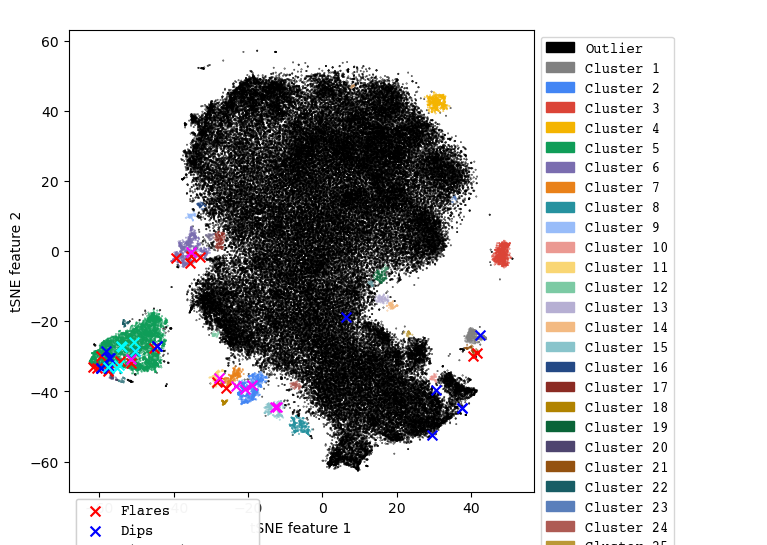

In [6]:
# PLOT
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

# Define Colour Scheme
google_blue = '#4285F4'
google_red = '#DB4437'
google_yellow = '#F4B400'
google_green = '#0F9D58'
google_purple = '#7A6DAF'
google_orange = '#E98119' ##EB8B14
google_turq = '#26929F'
light_blue = '#98BCF9'
light_red = '#EB9992'
light_yellow = '#F9D674'
light_green = '#7CCAA4'
light_purple = '#B6AFD3'
light_orange = '#F3BA82'
light_turq = '#89C4CB'
dark_blue = '#244985'
dark_red = '#8B2B23'
dark_yellow = '#B18300'
dark_green = '#0A6438'
dark_purple = '#4E456F'
dark_orange = '#945210' 
dark_turq = '#185D65'
grey_blue = '#5A7FBB'
grey_red = '#AE5B54'
grey_yellow = '#BB9836'
grey_green = '#3E8C66'
grey_purple = '#787290'
grey_orange = '#B57C44'
grey_turq = '#4B868D'


colors = ['black', 'grey',google_blue,google_red,google_yellow,google_green,google_purple,google_orange,google_turq, light_blue, light_red, light_yellow, light_green, light_purple, light_orange, light_turq, dark_blue, dark_red, dark_yellow, dark_green, dark_purple, dark_orange, dark_turq,grey_blue, grey_red, grey_yellow, grey_green, grey_purple, grey_orange, grey_turq]

cmap = ListedColormap(colors[:len(df_tsne_filter['cluster'].unique())])

# Create custom legend handles for clusters
unique_labels = df_tsne_filter['cluster'].unique()
print(unique_labels)
cluster_legend_handles = []
for i in range(len(unique_labels)):
    if i > 0:
        label = 'Cluster ' + str(unique_labels[i]+1)
        color = colors[i % len(colors)]
        cluster_legend_handles.append(mpatches.Patch(color=color, label=label))
    else:
        label = 'Outlier'
        color = colors[i % len(colors)]
        cluster_legend_handles.append(mpatches.Patch(color=color, label=label))

fig, axs = plt.subplots(1, 1, figsize=(6, 6))
plt.rcParams.update({'font.size': 10})
plt.rcParams['font.monospace'] = "Courier"
plt.rcParams["font.family"] = "monospace"
cluster = axs.scatter(df_tsne_filter['tsne1'], df_tsne_filter['tsne2'], s=0.1, c=df_tsne_filter['cluster'], cmap=cmap)
axs.set_xlabel('tSNE feature 1')
axs.set_ylabel('tSNE feature 2')
axs.scatter(tsne_flares['tsne1'], tsne_flares['tsne2'], c='red', marker='x', s=50, label='Flares')
axs.scatter(tsne_dips['tsne1'], tsne_dips['tsne2'], c='blue', marker='x', s=50, label='Dips')
axs.scatter(tsne_lin_irwin['tsne1'], tsne_lin_irwin['tsne2'], c='magenta', marker='x', s=50, label='Lin Irwin Flares')
axs.scatter(tsne_rosanne['tsne1'], tsne_rosanne['tsne2'], c='cyan', marker='x', s=50, label='Rosanne Dip')
# axs.set_title(dbscan_file)
axs.set_title('ccdfdftverjrvedvasssakhvkvk;hvkh;vdfbadgfbnadfnbadsgbnsdgnrverververvwrbgb',c='white', loc='left')

# Combine both legends into a single legend
cluster_legend = axs.legend(handles=cluster_legend_handles, bbox_to_anchor=(1, 1), loc='upper left')
anomaly_legend = axs.legend(bbox_to_anchor=(0, 0), loc='upper left') 
# No handles and labels are passed to create the second legend

# Add both legends to the plot
axs.add_artist(cluster_legend)
axs.add_artist(anomaly_legend)

plt.show()


Box

Text(0.5, 1.0, 'DBSCANres-Full-tsne-Full-hist3D-Full-nE16-nt24-ndt16-normnone-2D-perp125-lr175-ee1-it2000-PCA22-initrandom-rs505.csv-EPS1-MS30.csv')

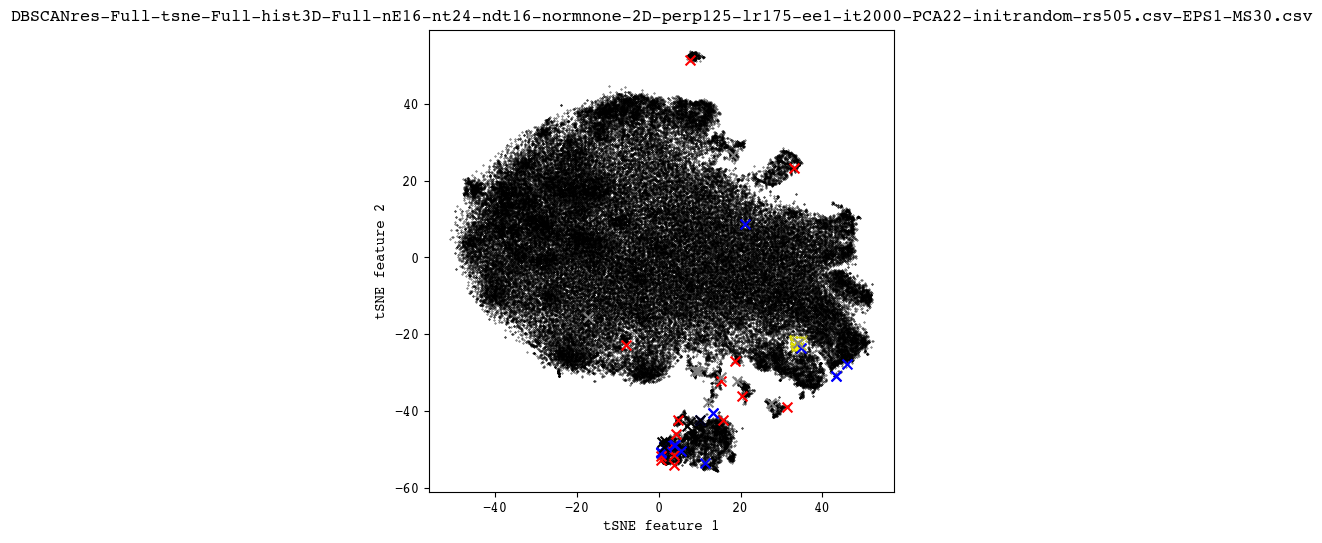

In [19]:
box_size = 2
# x0, y0 = -17.455505, -15.575752
x0, y0 = 34.027100,	-22.292643
xmin, xmax = x0 - box_size, x0 + box_size
ymin, ymax = y0 - box_size, y0 + box_size
points_in_box = df_tsne_filter[(df_tsne_filter['tsne1'] >= xmin) & (df_tsne_filter['tsne1'] <= xmax) & (df_tsne_filter['tsne2'] >= ymin) & (df_tsne_filter['tsne2'] <= ymax)]
potential_anomalies2 = points_in_box['obsreg_id']
df_properties_anomalies2 = df_properties_global[df_properties_global['obsreg_id'].isin(potential_anomalies2)]

fig, axs = plt.subplots(1, 1, figsize=(6, 6))
plt.rcParams.update({'font.size': 10})
plt.rcParams['font.monospace'] = "Courier"
plt.rcParams["font.family"] = "monospace"
rej = axs.scatter(df_tsne_filter['tsne1'], df_tsne_filter['tsne2'], s=0.1, c='black', label = 'Rejected Clusters')
acc = axs.scatter(points_in_box['tsne1'], points_in_box['tsne2'], s=0.1, c='yellow', label = 'Chosen Clusters')
axs.set_xlabel('tSNE feature 1')
axs.set_ylabel('tSNE feature 2')
axs.scatter(tsne_flares['tsne1'], tsne_flares['tsne2'], c='red', marker='x', s=50, label='Flares')
axs.scatter(tsne_dips['tsne1'], tsne_dips['tsne2'], c='blue', marker='x', s=50, label='Dips')
axs.scatter(tsne_rosanne['tsne1'], tsne_rosanne['tsne2'], c='black', marker='x', s=50, label='Rosanne Dip')
axs.scatter(tsne_lin_irwin['tsne1'], tsne_lin_irwin['tsne2'], c='grey', marker='x', s=50, label='Lin Irwin Flares')
axs.set_title(dbscan_file)

Cluster

Text(0.5, 1.0, 'DBSCANres-Full-tsne-Full-hist3D-Full-nE16-nt24-ndt16-normnone-2D-perp125-lr150-ee1-it2500-initrandom-PCA22-rs11-EPS1-MS30.csv')

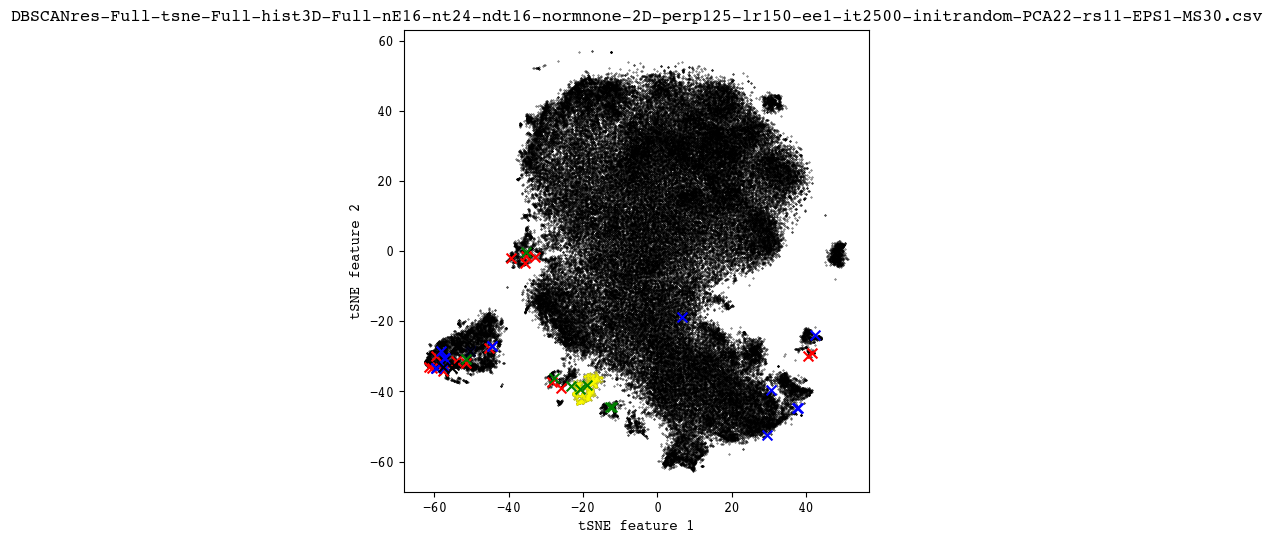

In [7]:
clust = 3
select_clusters = [clust-1]
df_select = df_tsne_filter[df_tsne_filter['cluster'].isin(select_clusters)]
potential_anomalies = df_select['obsreg_id']
df_properties_anomalies = df_properties_global[df_properties_global['obsreg_id'].isin(potential_anomalies)]

# df_properties_anomalies  = df_properties_anomalies[df_properties_anomalies['var_prob_b'] > 0.5]
# df_select = df_select[(df_select['tsne1'] >= 65) & (df_select['tsne1'] <= 69) & (df_select['tsne2'] >= -6) & (df_select['tsne2'] <= -5)]

# df_properties_anomalies.head(500)
# 67.453880	-5.705921	4062_31	3
# df_select = df_select[(df_select['tsne1'] >= 90) & (df_select['tsne1'] <= 95) & (df_select['tsne2'] >= 0.5) & (df_select['tsne2'] <= 1)]


fig, axs = plt.subplots(1, 1, figsize=(6, 6))
plt.rcParams.update({'font.size': 10})
plt.rcParams['font.monospace'] = "Courier"
plt.rcParams["font.family"] = "monospace"
rej = axs.scatter(df_tsne_filter['tsne1'], df_tsne_filter['tsne2'], s=0.1, c='black', label = 'Rejected Clusters')
acc = axs.scatter(df_select['tsne1'], df_select['tsne2'], s=0.1, c='yellow', label = 'Chosen Clusters')
axs.set_xlabel('tSNE feature 1')
axs.set_ylabel('tSNE feature 2')
axs.scatter(tsne_flares['tsne1'], tsne_flares['tsne2'], c='red', marker='x', s=50, label='Flares')
axs.scatter(tsne_dips['tsne1'], tsne_dips['tsne2'], c='blue', marker='x', s=50, label='Dips')
axs.scatter(tsne_rosanne['tsne1'], tsne_rosanne['tsne2'], c='black', marker='x', s=50, label='Rosanne Dip')
axs.scatter(tsne_lin_irwin['tsne1'], tsne_lin_irwin['tsne2'], c='green', marker='x', s=50, label='Lin Irwin Flares')
axs.set_title(dbscan_file)

Lightcurves

In [34]:
pd.set_option('display.max_columns', None)
df_properties_anomalies.head()
print(df_properties_anomalies.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 503 entries, 106 to 128806
Data columns (total 76 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   name                   503 non-null    object 
 1   ra                     503 non-null    float64
 2   dec                    503 non-null    float64
 3   err_ellipse_r0         503 non-null    float64
 4   err_ellipse_r1         503 non-null    float64
 5   err_ellipse_ang        503 non-null    float64
 6   significance           503 non-null    float64
 7   likelihood_class       503 non-null    object 
 8   conf_flag              503 non-null    bool   
 9   sat_src_flag           503 non-null    bool   
 10  streak_src_flag        503 non-null    bool   
 11  flux_aper_b            497 non-null    float64
 12  flux_aper_lolim_b      497 non-null    float64
 13  flux_aper_hilim_b      497 non-null    float64
 14  flux_aper_w            2 non-null      float64
 15  f

624
Source:  2CXO J111515.5-611551
ID:  12328_613
Counts:  429
Observation Date:  2010-10-07T08:00:10


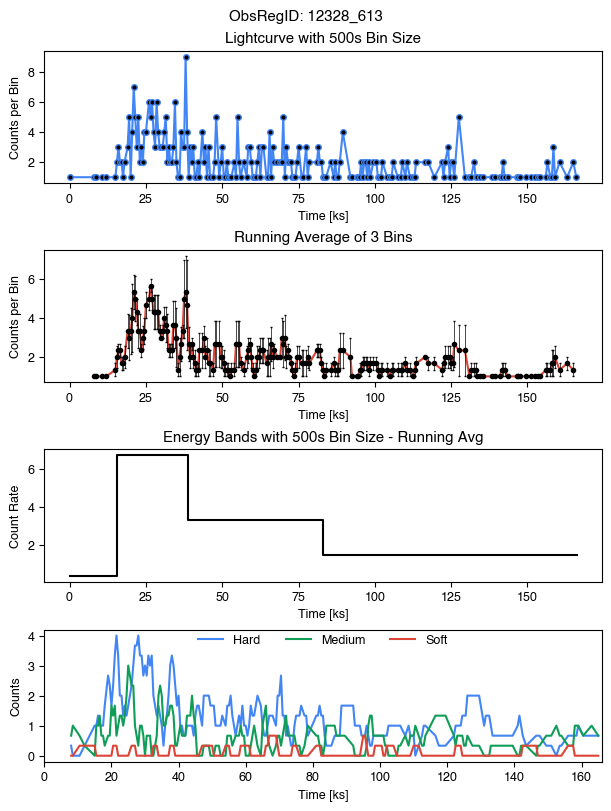

Source:  2CXO J174802.6-244602
ID:  12454_261
Counts:  69
Observation Date:  2011-11-03T05:30:34


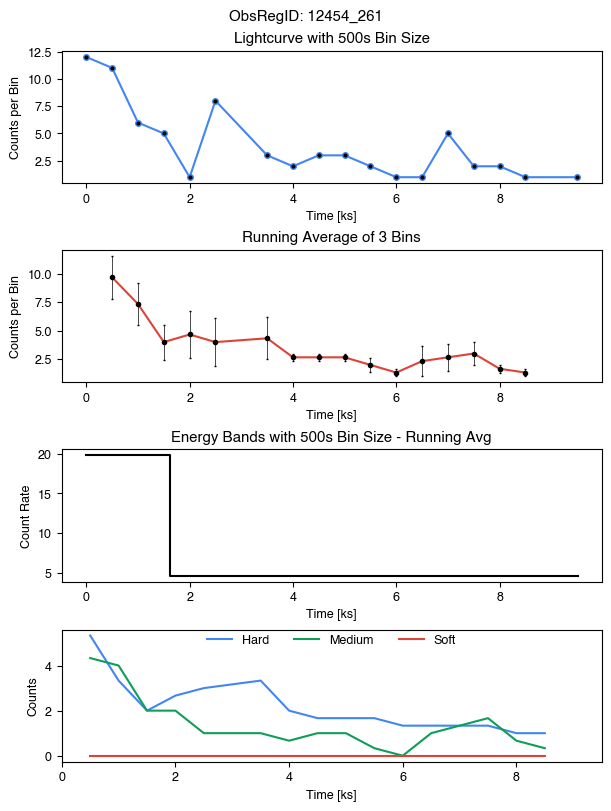

Source:  2CXO J053511.5-052447
ID:  13637_1281
Counts:  399
Observation Date:  2012-10-02T07:23:02


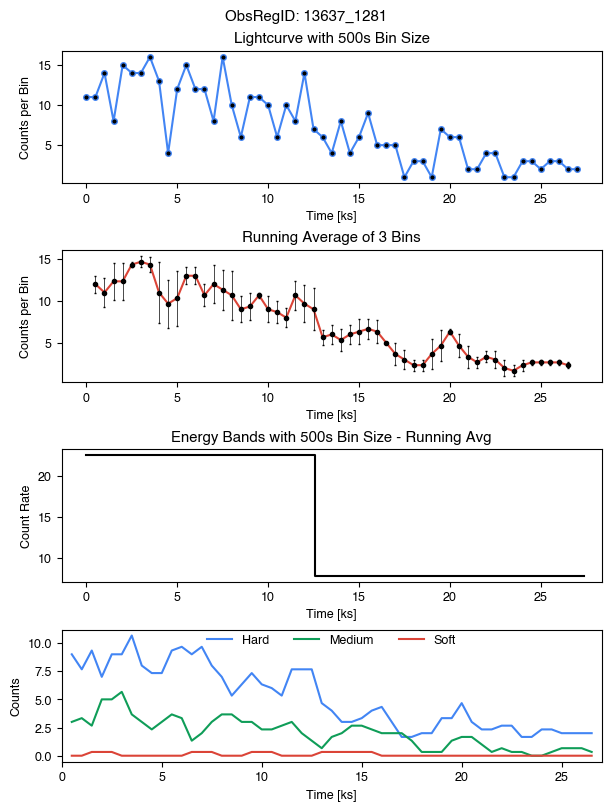

Source:  2CXO J155337.6-551350
ID:  13768_511
Counts:  120
Observation Date:  2012-05-22T00:49:14


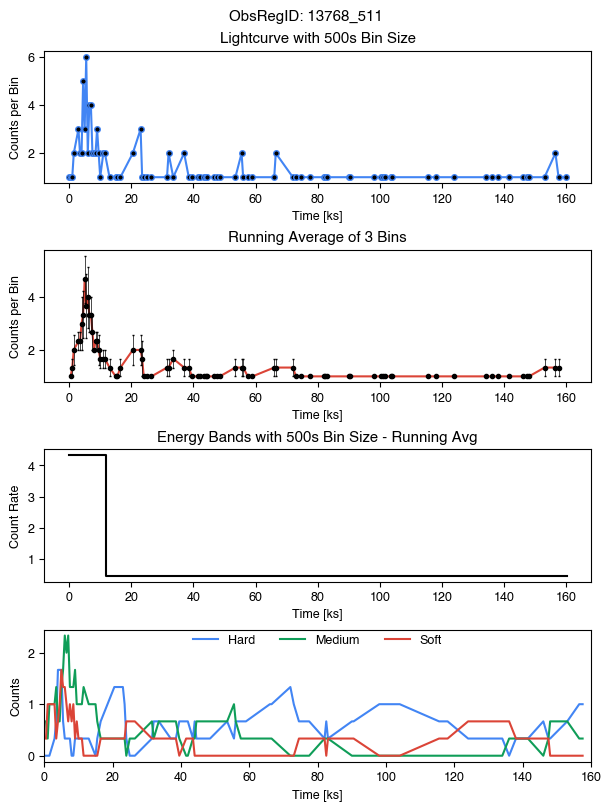

Source:  2CXO J224247.3+530201
ID:  14020_17
Counts:  36
Observation Date:  2012-04-21T13:26:48


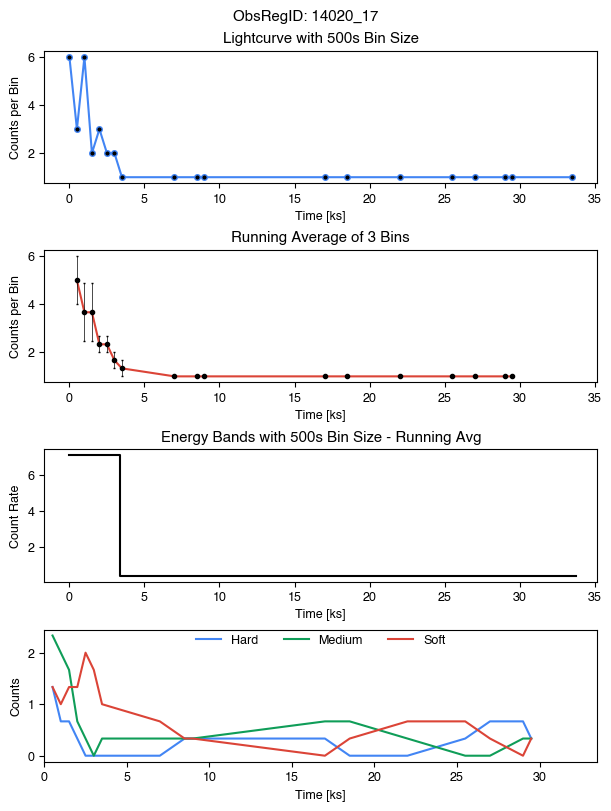

Source:  2CXO J224324.0+530319
ID:  14020_26
Counts:  60
Observation Date:  2012-04-21T13:26:48


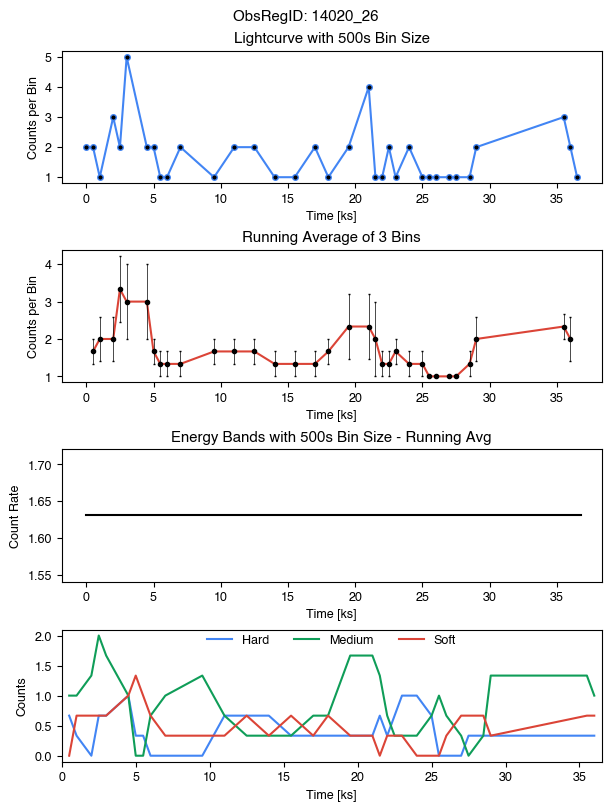

Source:  2CXO J004339.0+412115
ID:  14195_199
Counts:  78
Observation Date:  2012-08-14T15:33:45


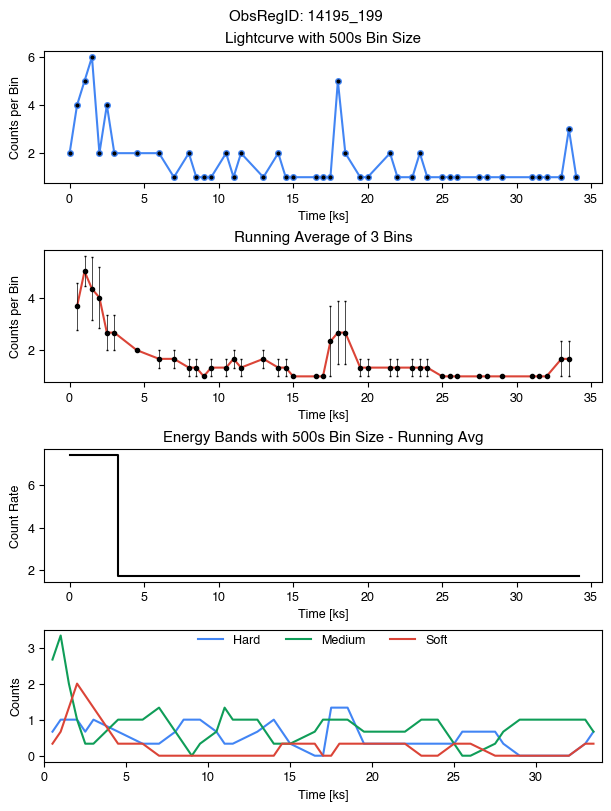

Source:  2CXO J053514.8-052231
ID:  14335_2649
Counts:  498
Observation Date:  2012-10-04T08:39:21


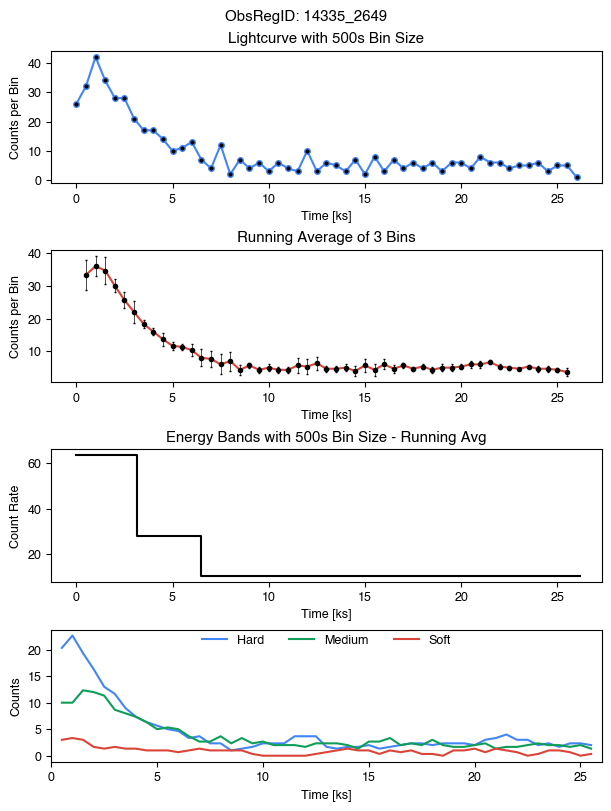

Source:  2CXO J053448.7-051906
ID:  14335_3391
Counts:  81
Observation Date:  2012-10-04T08:39:21


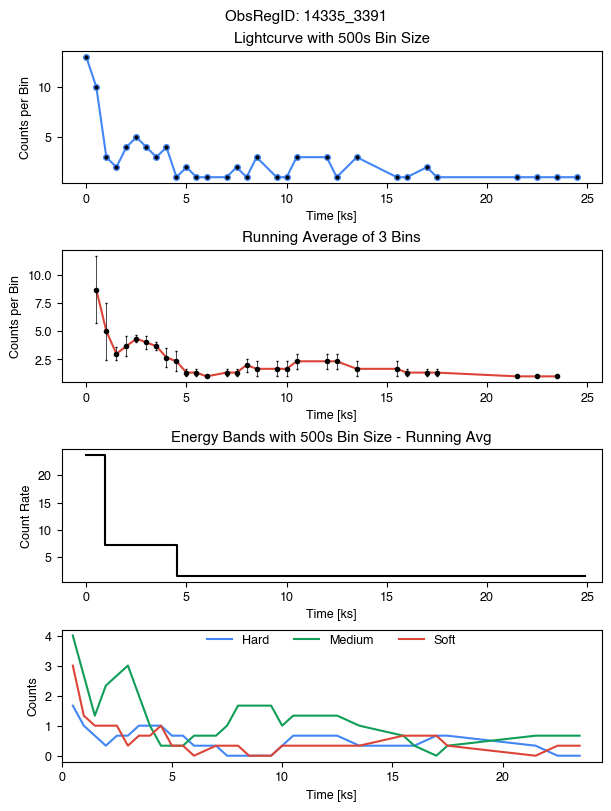

Source:  2CXO J052034.3+302954
ID:  14940_11
Counts:  89
Observation Date:  2013-11-12T04:58:55


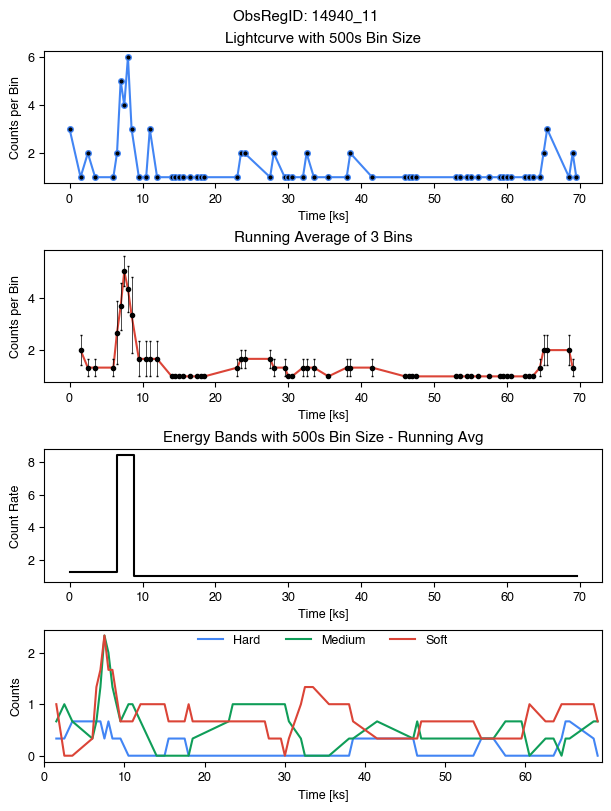

Source:  2CXO J132939.9+471236
ID:  1622_74
Counts:  43
Observation Date:  2001-06-23T19:02:18


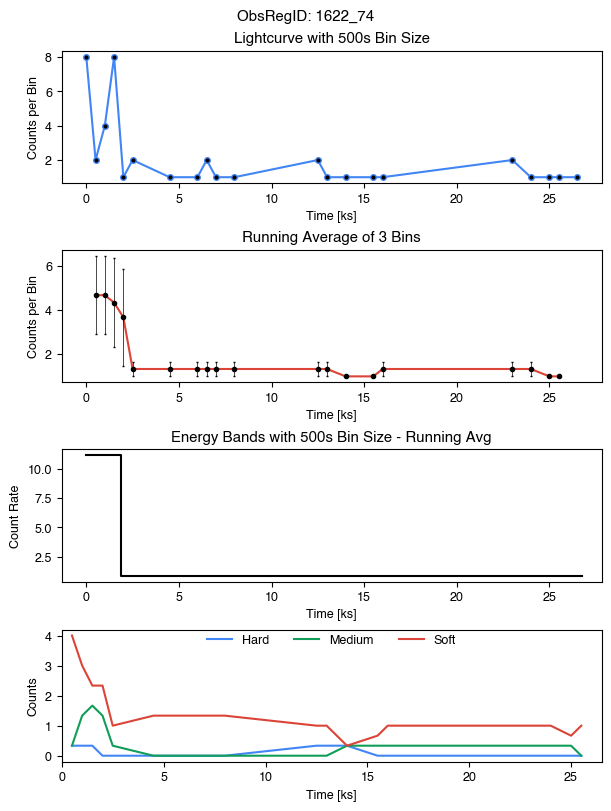

Source:  2CXO J222910.2+582454
ID:  16684_10
Counts:  68
Observation Date:  2015-05-08T20:35:46


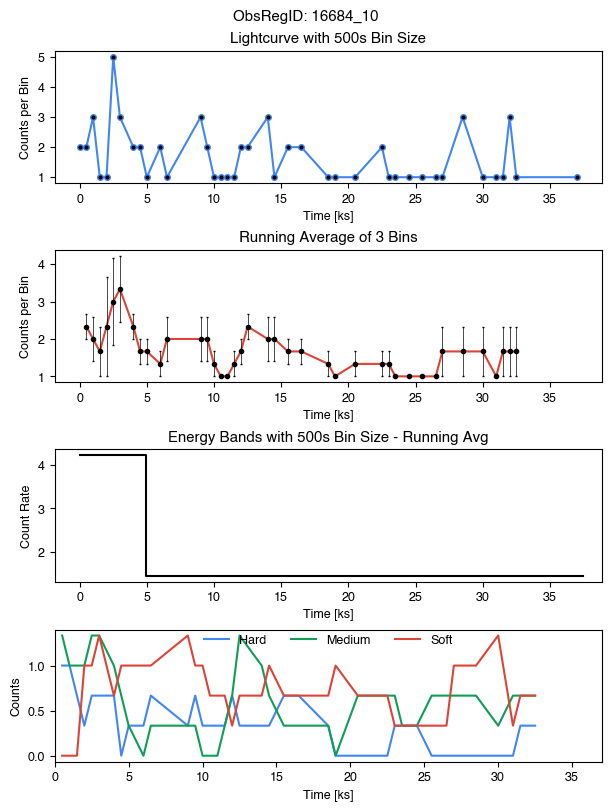

Source:  2CXO J134630.7+262820
ID:  17479_32
Counts:  64
Observation Date:  2015-04-28T19:10:39


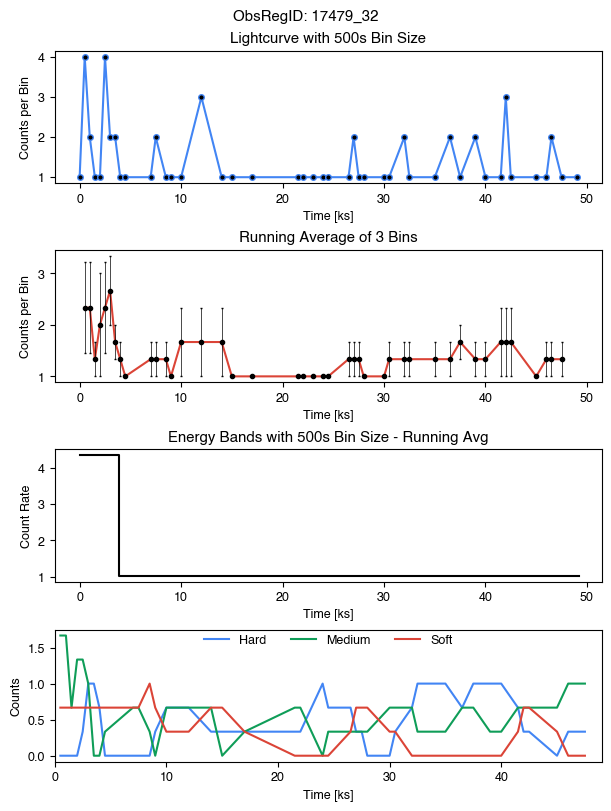

Source:  2CXO J170029.0-460817
ID:  17870_103
Counts:  253
Observation Date:  2016-06-22T06:16:25


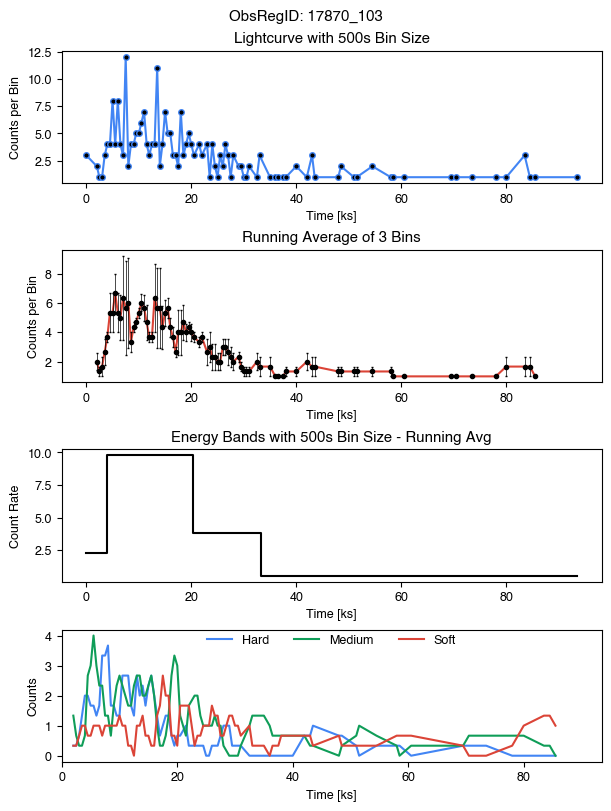

Source:  2CXO J122201.2+042937
ID:  2149_33
Counts:  194
Observation Date:  2001-08-07T22:20:53


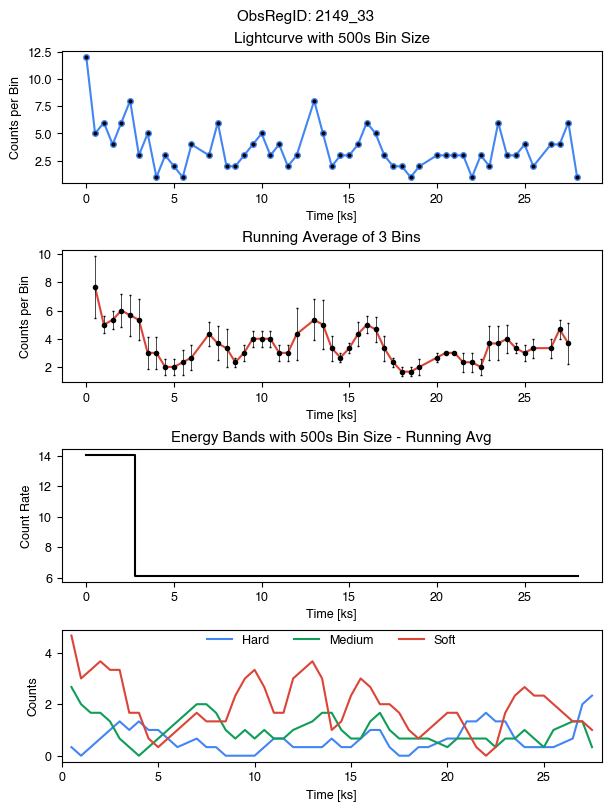

Source:  2CXO J184321.2-034931
ID:  2298_107
Counts:  42
Observation Date:  2001-05-20T09:05:30


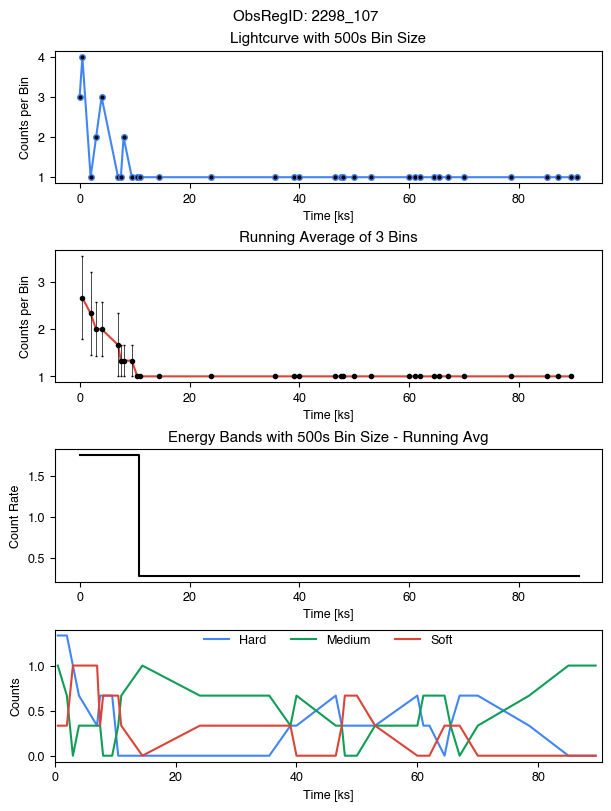

Source:  2CXO J064114.4+093321
ID:  2540_112
Counts:  495
Observation Date:  2002-10-28T15:03:51


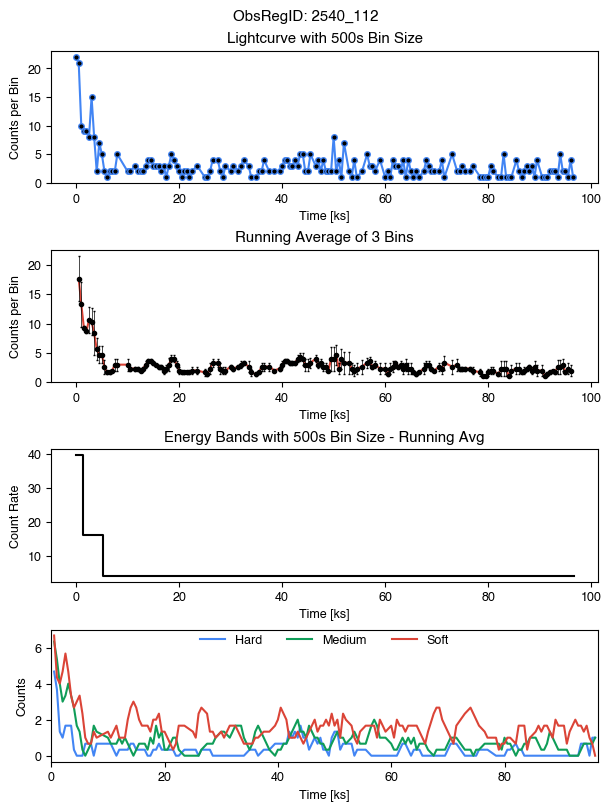

Source:  2CXO J064047.5+094926
ID:  2550_53
Counts:  44
Observation Date:  2002-02-09T05:26:30


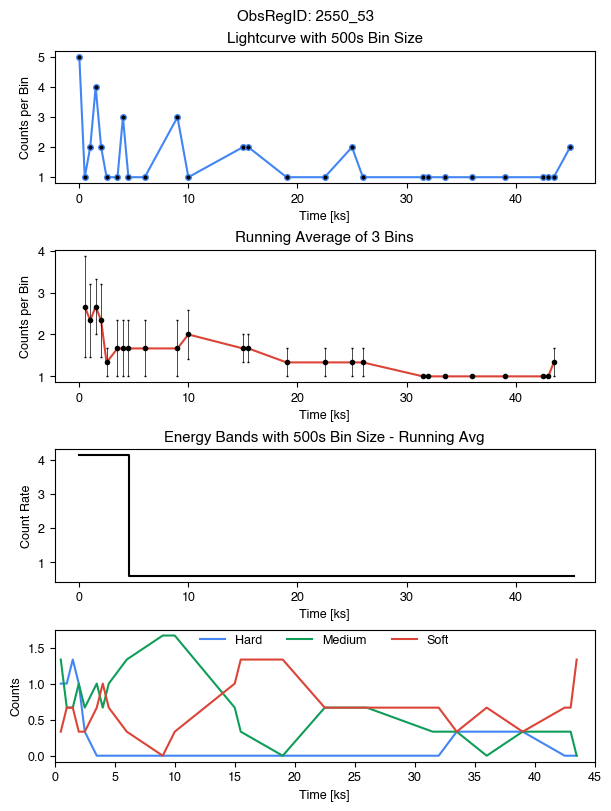

Source:  2CXO J085855.4-473024
ID:  2556_550
Counts:  220
Observation Date:  2001-12-10T10:31:29


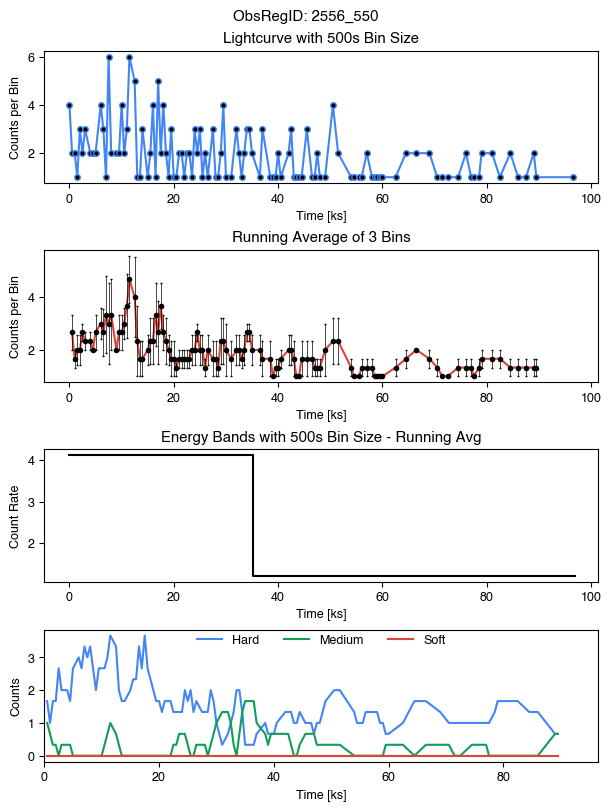

Source:  2CXO J050713.9-373001
ID:  3012_175
Counts:  77
Observation Date:  2002-12-19T07:40:18


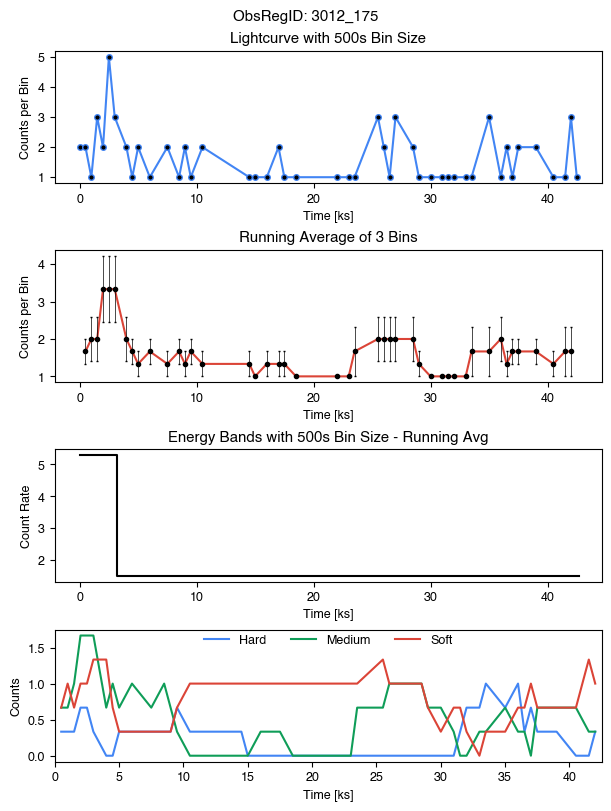

Source:  2CXO J053513.5-051745
ID:  3744_1493
Counts:  324
Observation Date:  2003-01-10T16:33:58


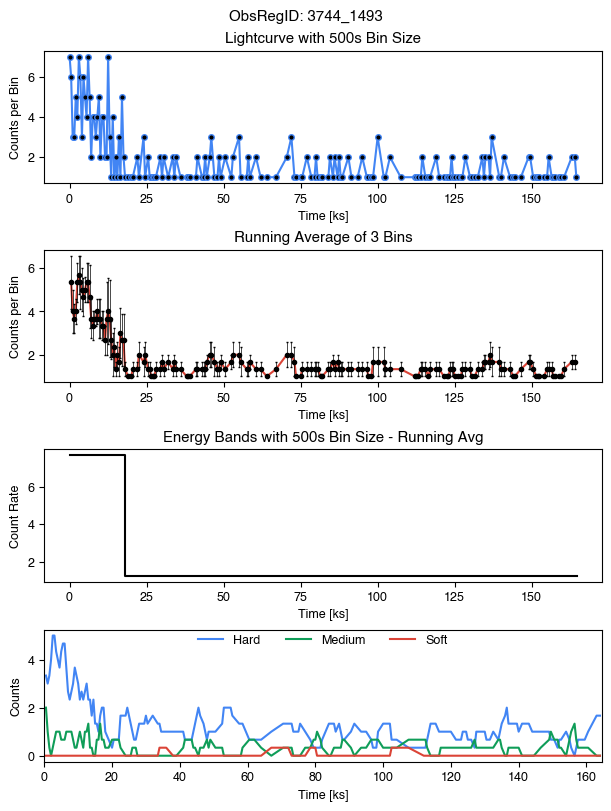

Source:  2CXO J180338.4-242231
ID:  3754_235
Counts:  260
Observation Date:  2003-07-25T17:51:20


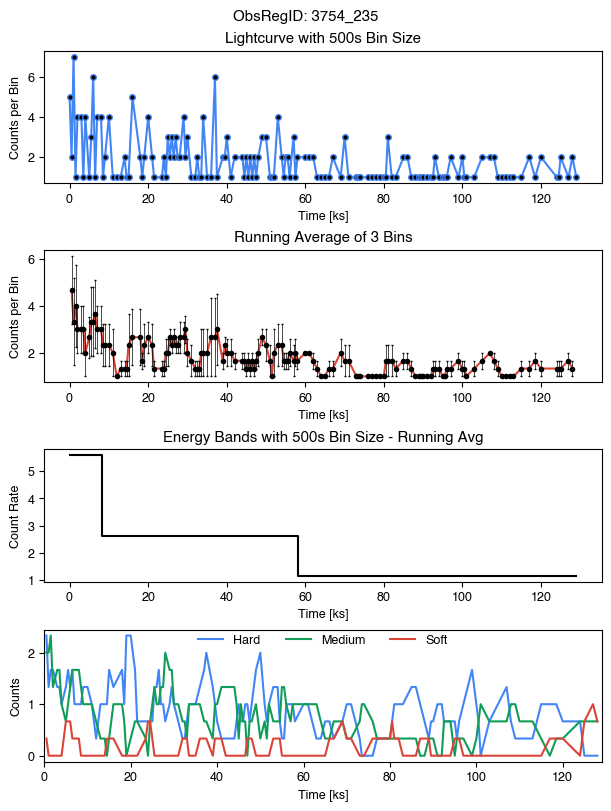

Source:  2CXO J053929.4-285713
ID:  4274_100
Counts:  179
Observation Date:  2003-07-21T14:40:02


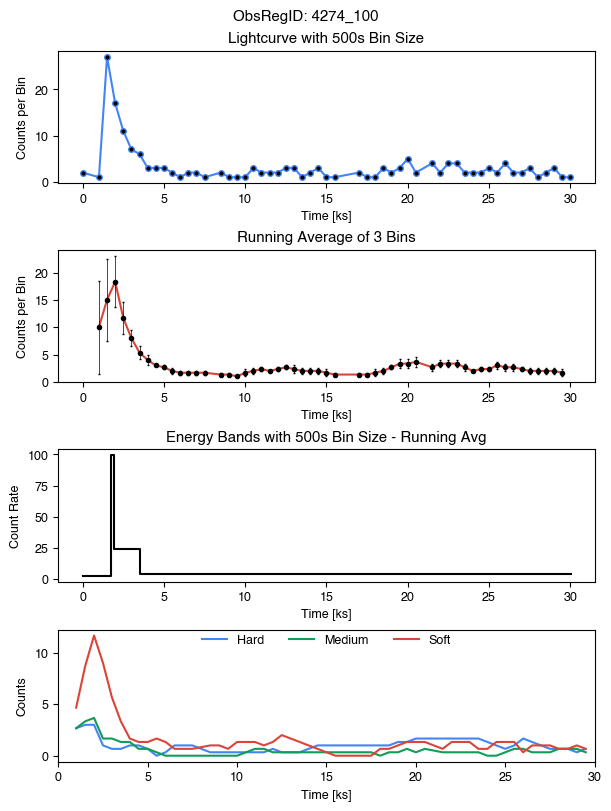

Source:  2CXO J053525.2-051535
ID:  4396_1052
Counts:  101
Observation Date:  2003-01-18T14:51:01


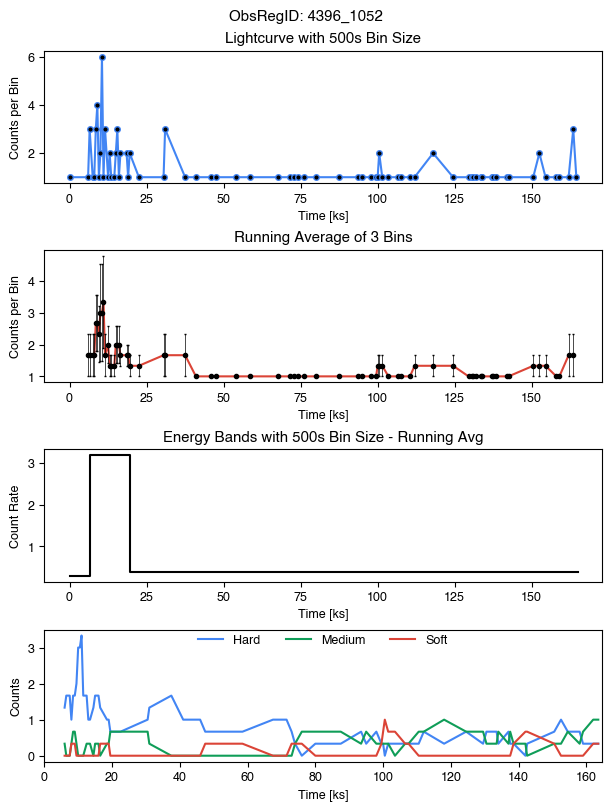

Source:  2CXO J053523.9-051907
ID:  4396_1596
Counts:  134
Observation Date:  2003-01-18T14:51:01


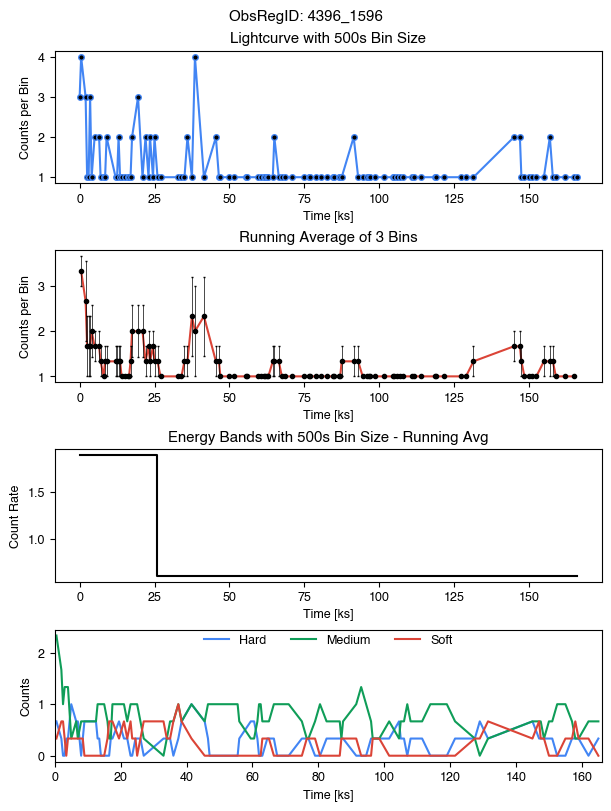

Source:  2CXO J042706.4+244644
ID:  4499_6
Counts:  40
Observation Date:  2004-07-24T10:18:42


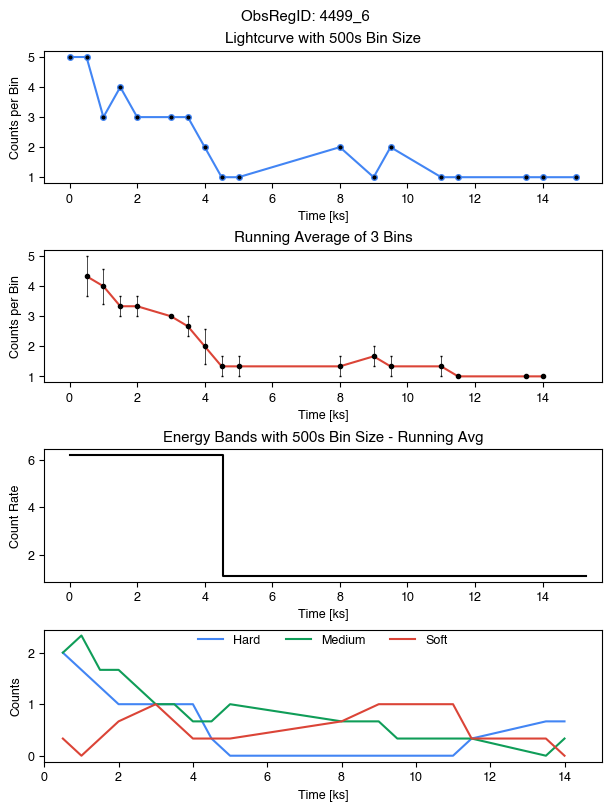

Source:  2CXO J164051.7-485004
ID:  4503_544
Counts:  301
Observation Date:  2004-10-25T03:02:12


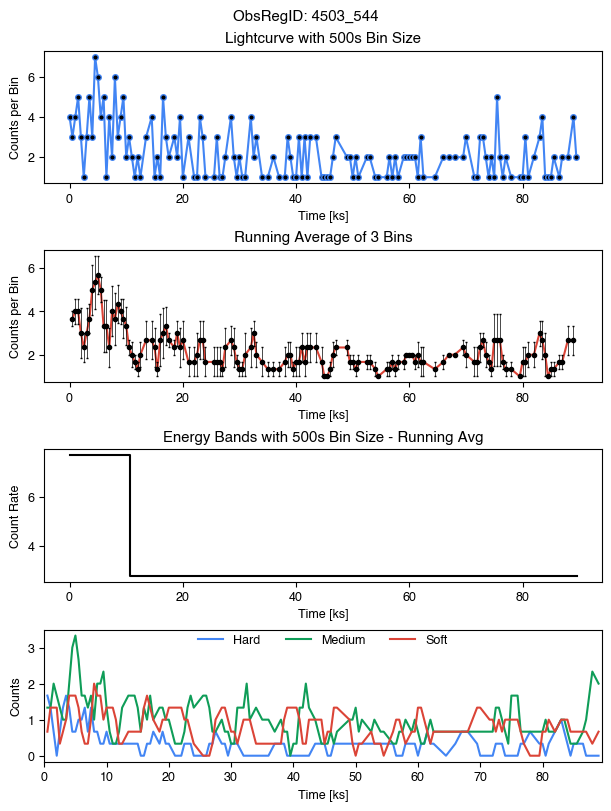

Source:  2CXO J203316.3+411859
ID:  4511_490
Counts:  422
Observation Date:  2004-01-16T11:08:09


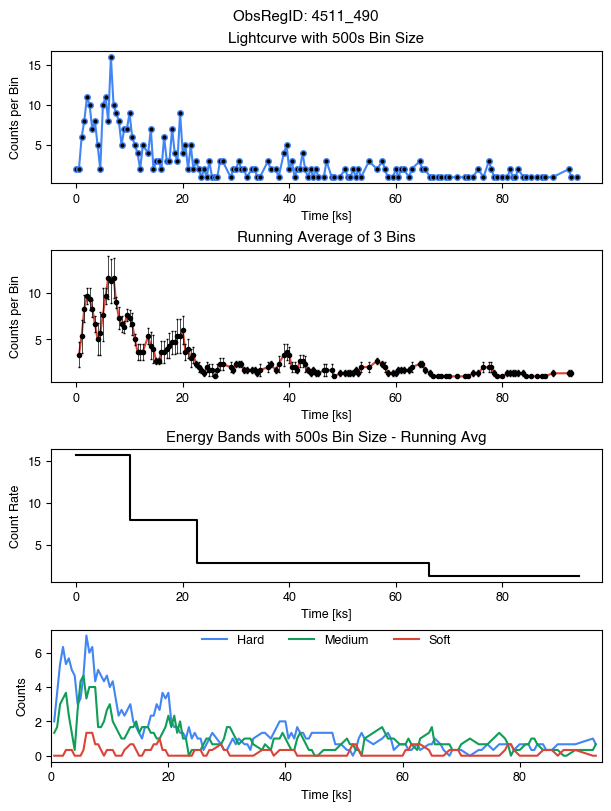

Source:  2CXO J123038.8+413810
ID:  4726_13
Counts:  194
Observation Date:  2004-11-20T06:49:51


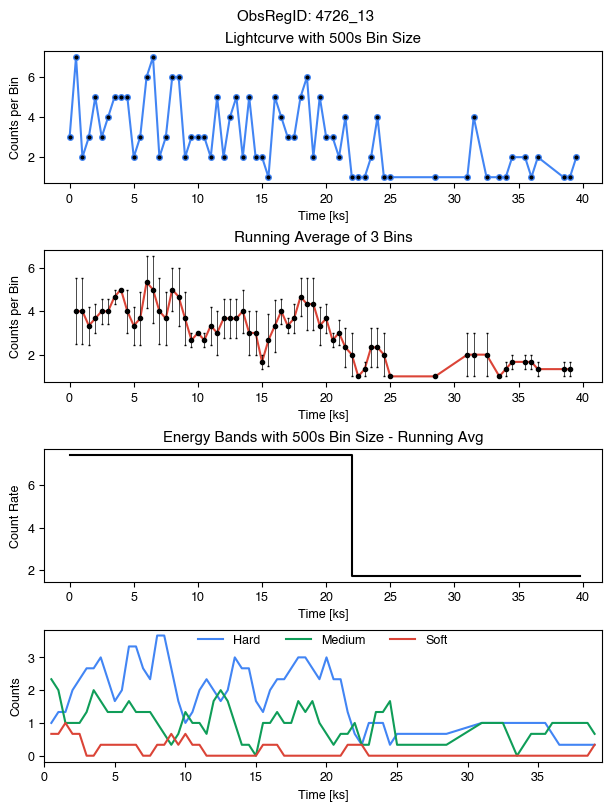

Source:  2CXO J165746.2+275025
ID:  4972_16
Counts:  126
Observation Date:  2003-12-29T15:49:00


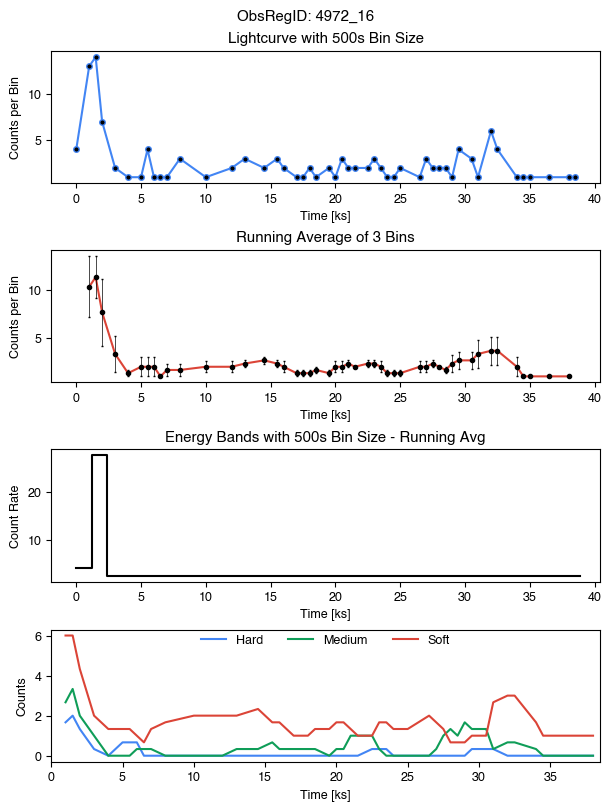

Source:  2CXO J165348.0-414750
ID:  5372_868
Counts:  67
Observation Date:  2005-07-03T06:33:29


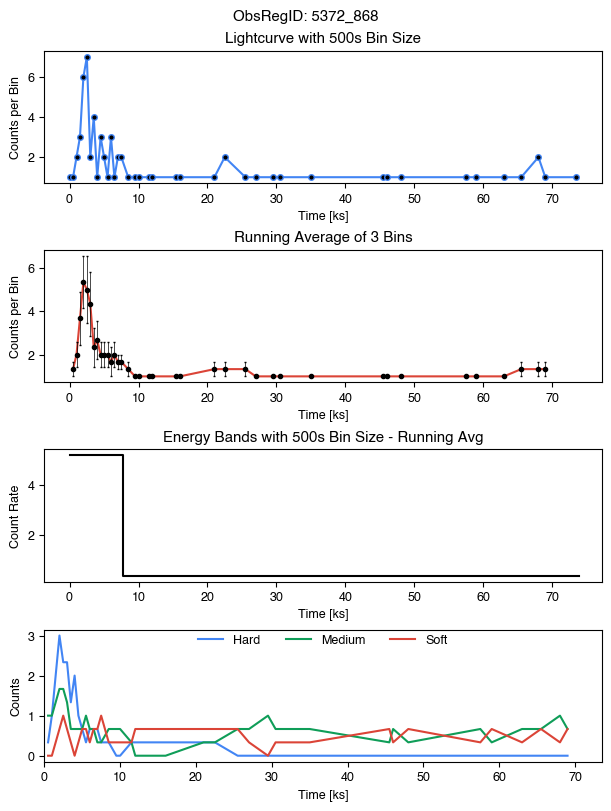

Source:  2CXO J165407.8-414633
ID:  5372_990
Counts:  156
Observation Date:  2005-07-03T06:33:29


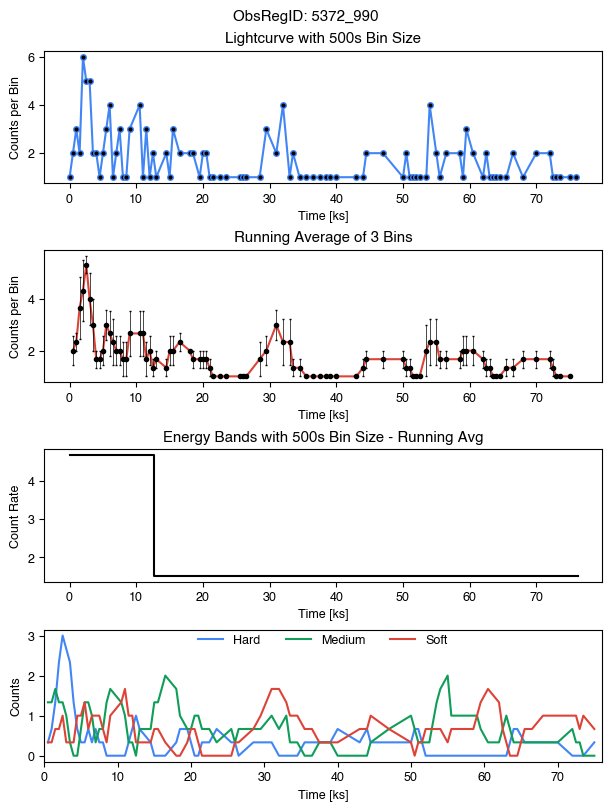

Source:  2CXO J104438.1-594434
ID:  6402_217
Counts:  100
Observation Date:  2006-08-30T19:02:43


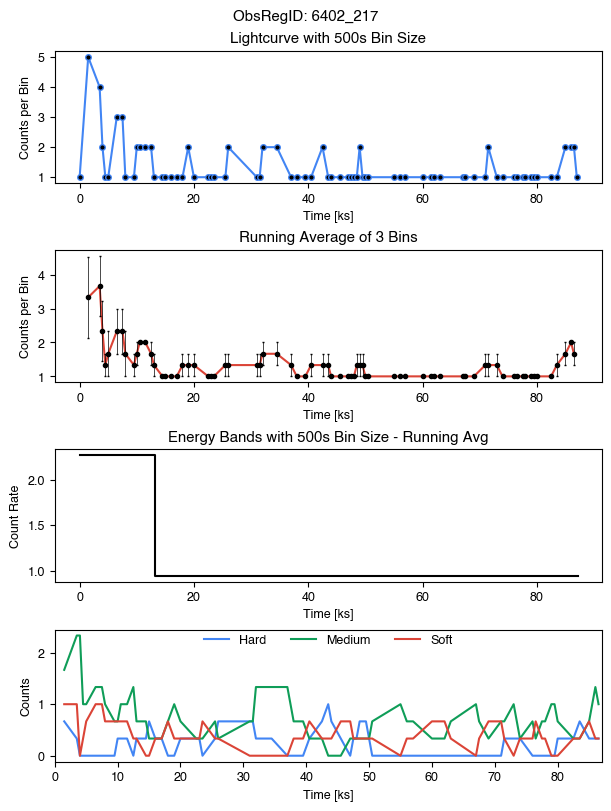

Source:  2CXO J104501.8-594710
ID:  6402_939
Counts:  46
Observation Date:  2006-08-30T19:02:43


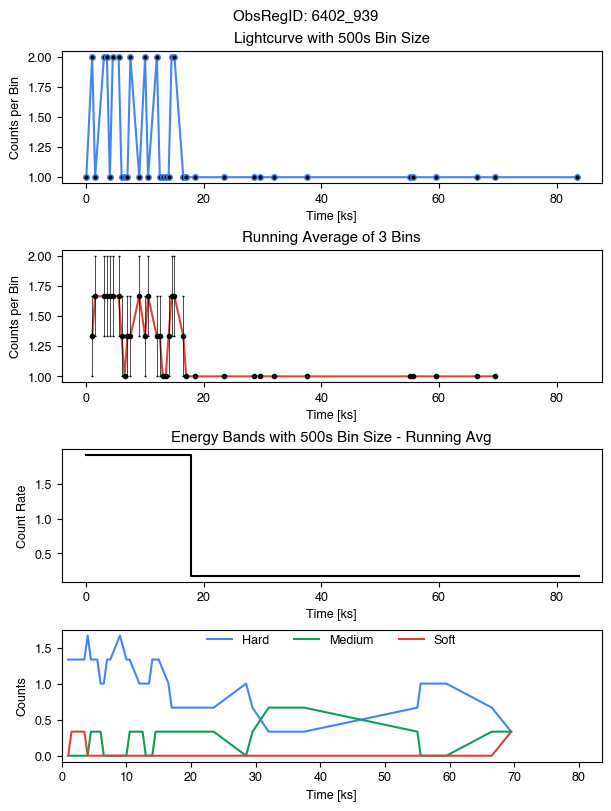

Source:  2CXO J182030.7-160304
ID:  6403_3036
Counts:  116
Observation Date:  2006-11-06T22:40:37


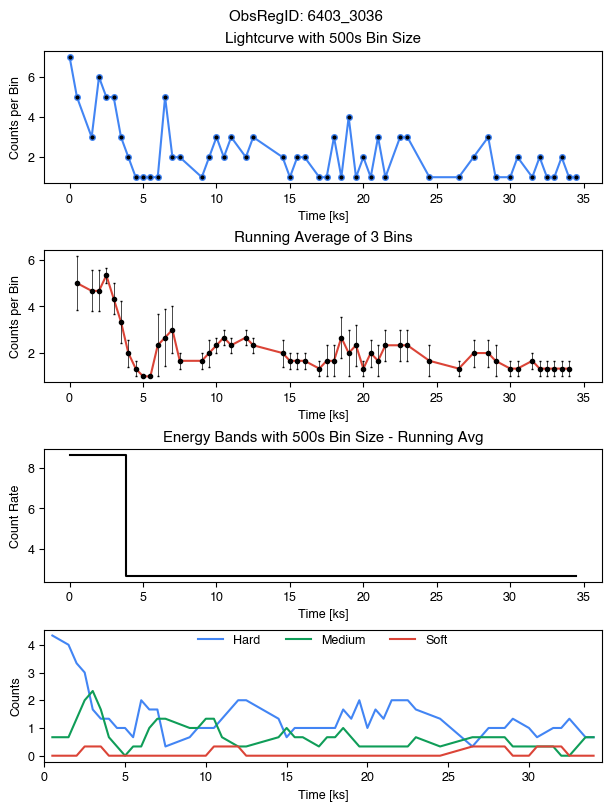

Source:  2CXO J182106.4-161638
ID:  6422_344
Counts:  108
Observation Date:  2006-08-21T01:36:37


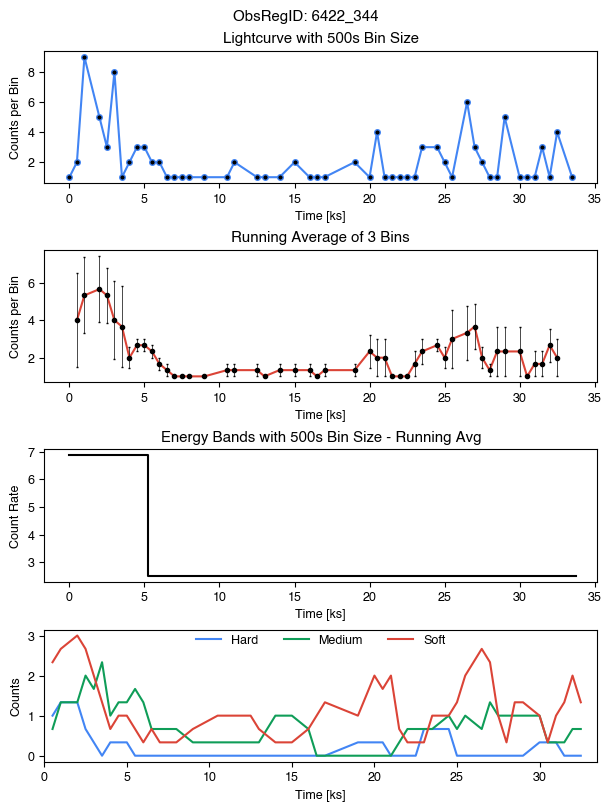

Source:  2CXO J131120.6-012257
ID:  6930_228
Counts:  189
Observation Date:  2006-03-06T05:11:16


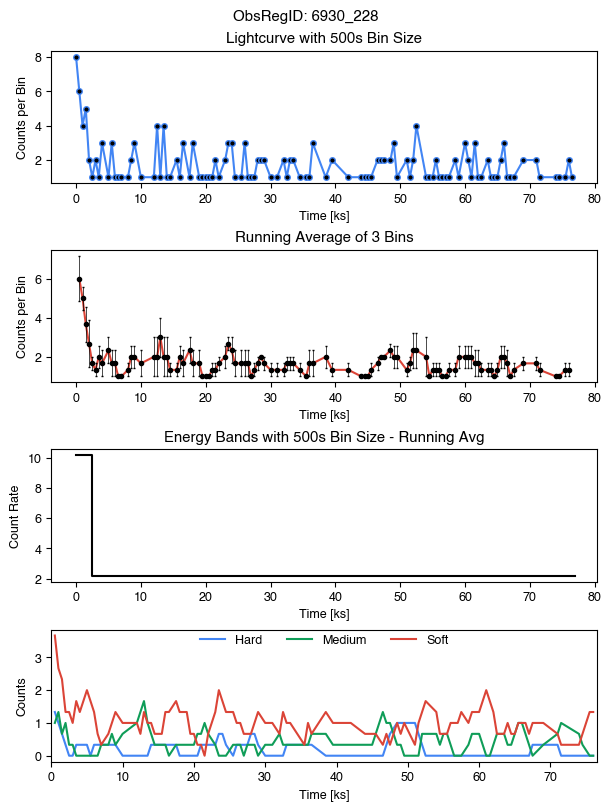

Source:  2CXO J151437.5+364041
ID:  800_34
Counts:  143
Observation Date:  2000-06-06T16:19:59


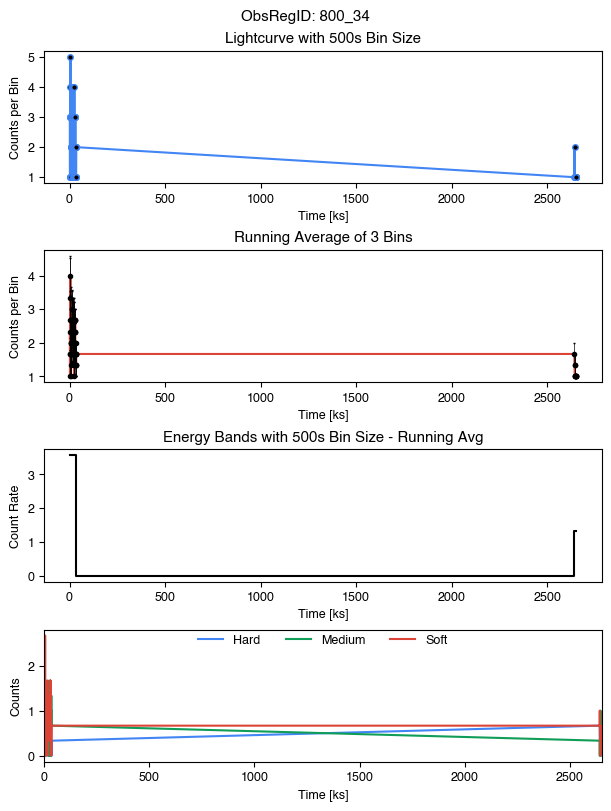

Source:  2CXO J151447.0+364150
ID:  800_37
Counts:  299
Observation Date:  2000-06-06T16:19:59


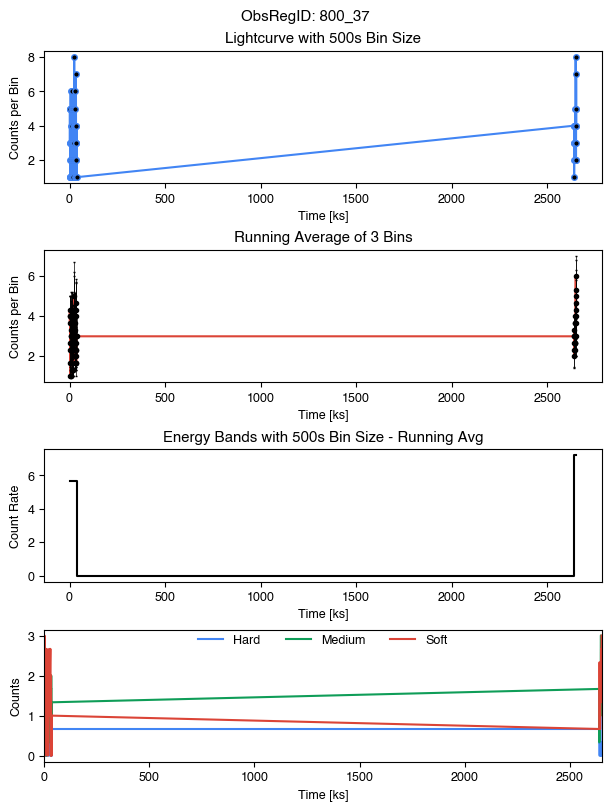

Source:  2CXO J151357.7+364215
ID:  800_38
Counts:  88
Observation Date:  2000-06-06T16:19:59


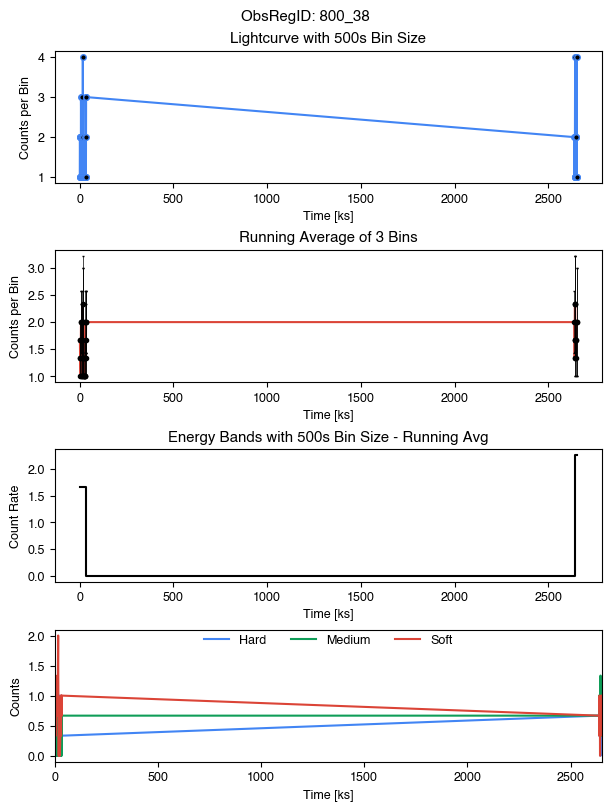

Source:  2CXO J151454.3+363933
ID:  800_47
Counts:  75
Observation Date:  2000-06-06T16:19:59


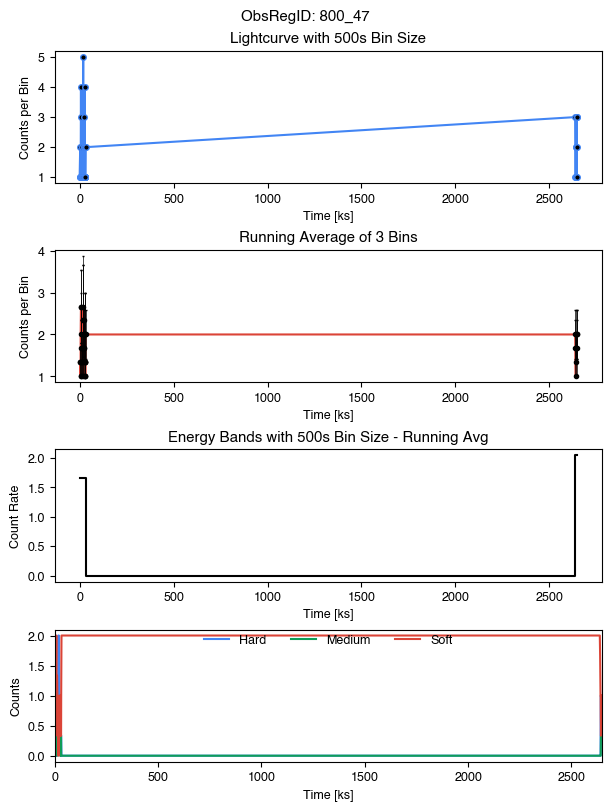

Source:  2CXO J151455.7+364313
ID:  800_63
Counts:  87
Observation Date:  2000-06-06T16:19:59


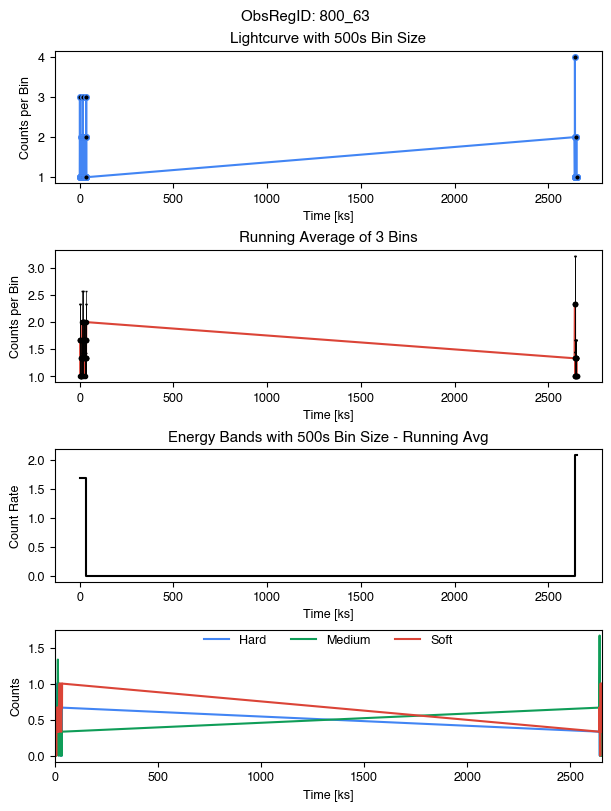

Source:  2CXO J022334.8+430442
ID:  828_32
Counts:  50
Observation Date:  2000-11-20T09:10:03


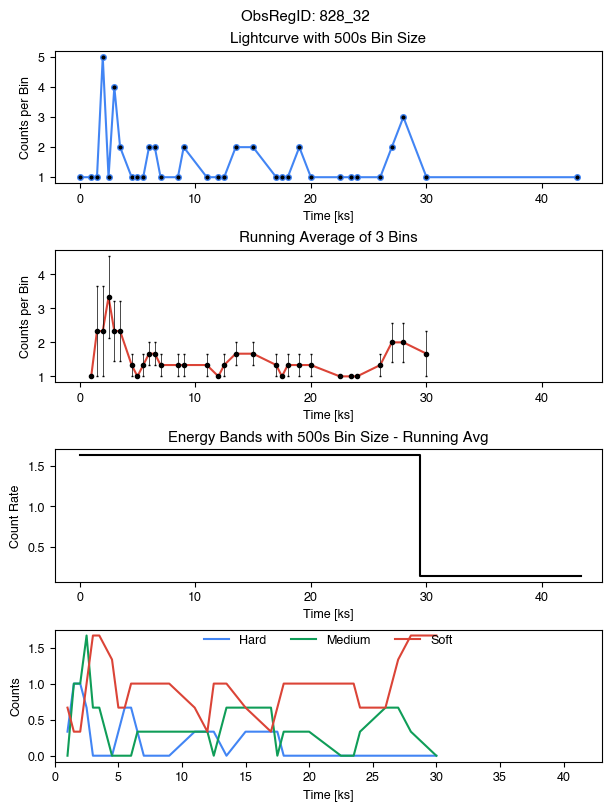

Source:  2CXO J184610.2+795541
ID:  830_151
Counts:  286
Observation Date:  2000-04-17T15:44:20


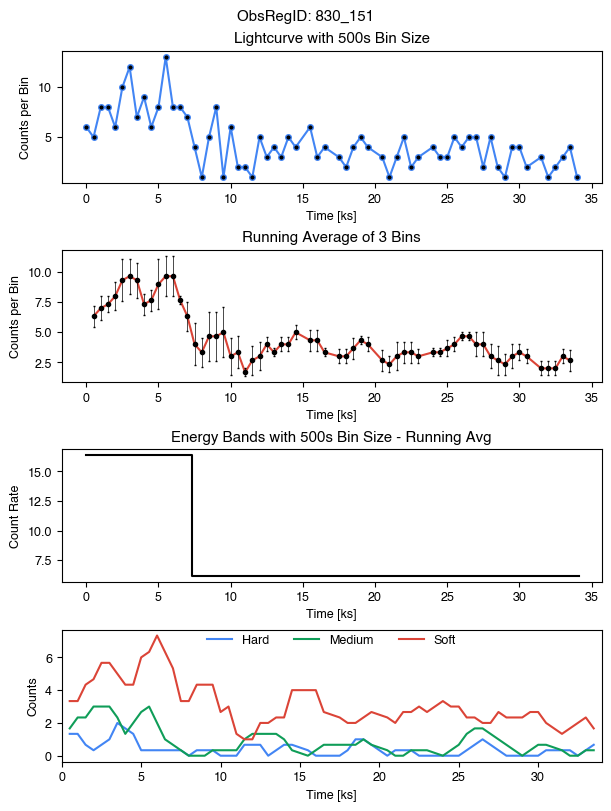

Source:  2CXO J184057.3+795554
ID:  830_212
Counts:  181
Observation Date:  2000-04-17T15:44:20


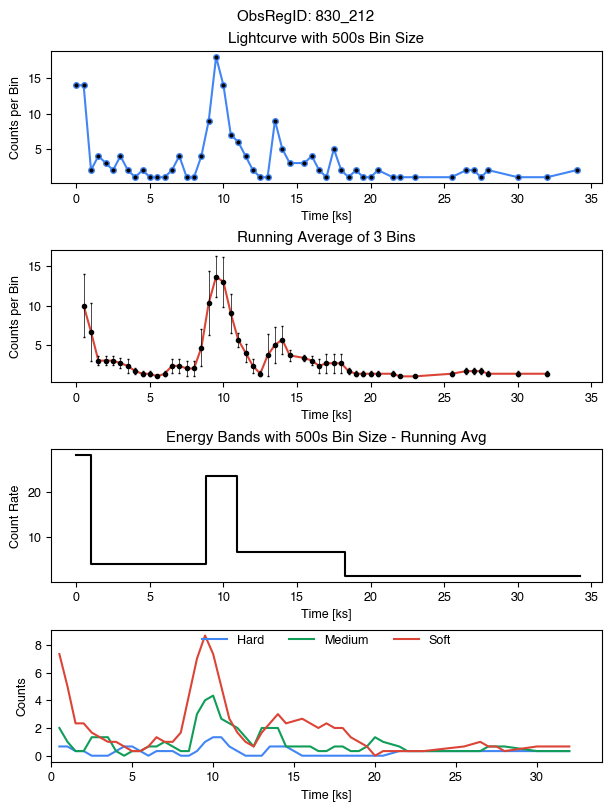

Source:  2CXO J193053.1+185308
ID:  9109_50
Counts:  104
Observation Date:  2008-07-12T09:26:32


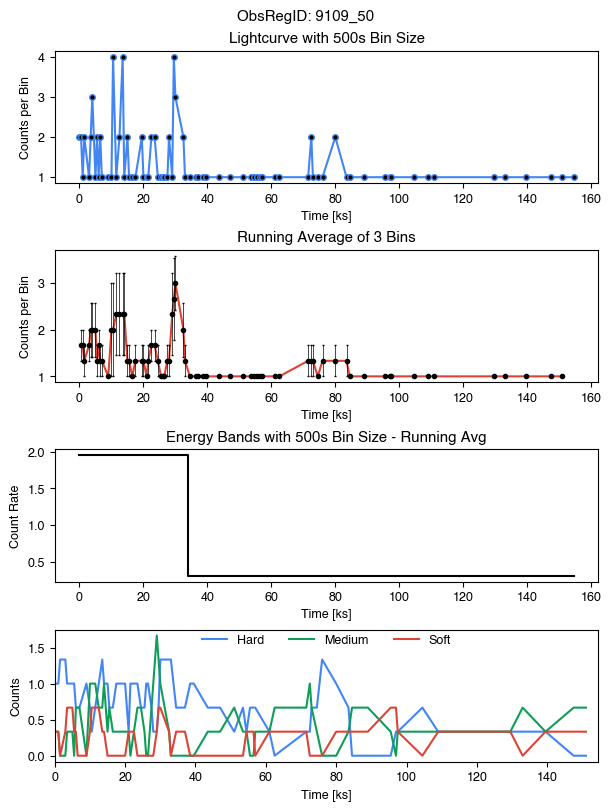

Source:  2CXO J122251.5+154938
ID:  9121_83
Counts:  41
Observation Date:  2008-04-20T07:30:41


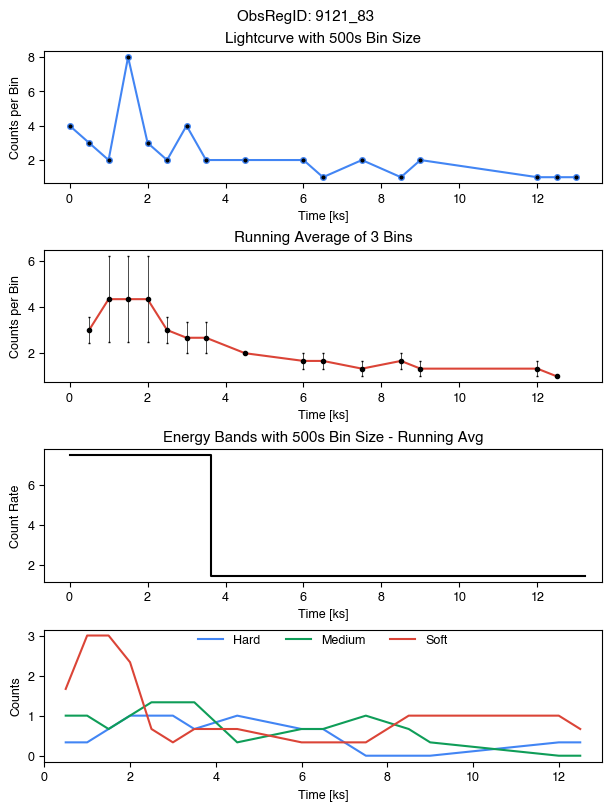

Source:  2CXO J182422.5-245206
ID:  9133_152
Counts:  65
Observation Date:  2008-08-11T00:07:25


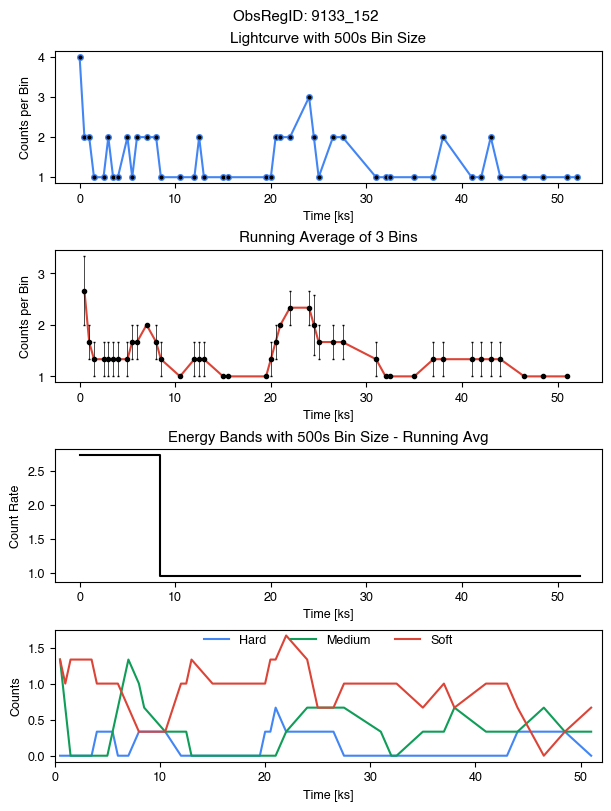

Source:  2CXO J181835.7-134252
ID:  978_728
Counts:  52
Observation Date:  2001-07-30T19:11:02


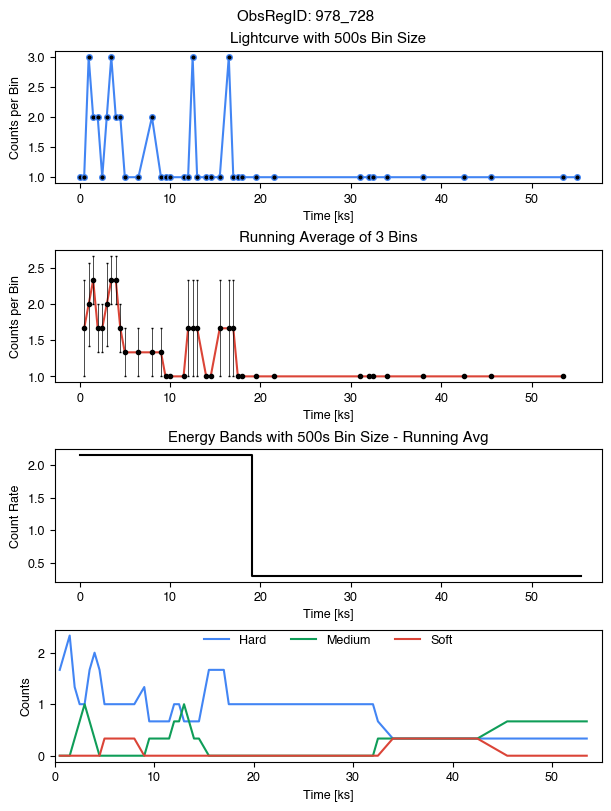

Source:  2CXO J141946.3+525942
ID:  9842_345
Counts:  402
Observation Date:  2008-04-02T21:18:27


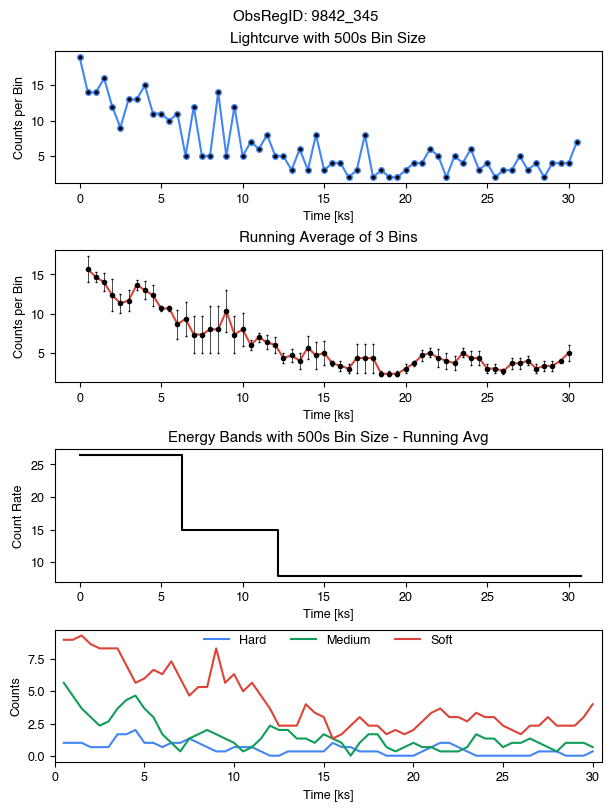

In [9]:
####
# df_properties_anomalies = df_properties_anomalies2 # comment out for clusters
# df_select = points_in_box# comment out for clusters
potential_anomalies = df_properties_anomalies['obsreg_id']
potential_anomalies = df_select['obsreg_id']
print(len(potential_anomalies))
keep = potential_anomalies.values[100:150]



# keep = ['13814_86','2540_253','633_2117']
# keep = ['6442_37','11231_250','5424_145','16000_221']
# keep = ['3012_53','3744_830','4373_662','4396_2625','13117_169','13653_40','6291_253']
# keep = ['12330_2071','10135_343','11073_116','11073_116','13951_16']
# keep = potential_anomalies.values
# keep = ['9912_482']
years = range(1999,2023)
# Image producer
# keep = all_ids[50000:55000]
df_eventfiles_group_filtered = df_eventfiles_group.filter(lambda x: x.name in keep).groupby('obsreg_id')
for id_name, dfi in df_eventfiles_group_filtered:
    dfi.sort_values(by='time', inplace = True) 
    dfi.reset_index(drop=True, inplace = True)
    name = df_properties_anomalies[df_properties_anomalies['obsreg_id'] == id_name].name.values[0]
    ra = df_properties_anomalies[df_properties_anomalies['obsreg_id'] == id_name].ra.values[0]
    dec = df_properties_anomalies[df_properties_anomalies['obsreg_id'] == id_name].dec.values[0]
    date = df_properties_anomalies[df_properties_anomalies['obsreg_id'] == id_name].gti_obs.values[0] 
    if any(str(year) in date for year in years):
        print('Source: ', name)
        print('ID: ', id_name)
        print('Counts: ', len(dfi))
        print('Observation Date: ', date)
        lightcurveplotterNEW(dfi,id_name,500,bb_p0=0.01,band_errors=False)
    else:
        pass
    # # hist2D(dfi,id_name,16,24,'minmax',True,'plasma',lognorm=True)
    # # hist2D(dfi,id_name,16,24,'minmax',True,'plasma',lognorm=False)
    # hist3D(dfi,id_name,16,24,24,'minmax',True,'plasma',lognorm=True)
    #hist3D(dfi,id_name,16,24,24,'minmax',True,'plasma',lognorm=False)
    # hist3Dlog(dfi,id_name,16,24,24,'minmax',True,'plasma')

In [65]:
potential_anomalies = df_properties_anomalies['obsreg_id']
df_properties_anomalies = df_properties_global[df_properties_global['obsreg_id'].isin(potential_anomalies)]
# keep = ['13814_86','2540_253','633_2117']
keep = ['4373_704','17196_22']
keep = potential_anomalies
keep = ['4373_704','17196_22','5322_229']
df_properties_anomalies = df_properties_global[df_properties_global['obsreg_id'].isin(keep)]
df_properties_anomalies.head(500)

name          ra        dec  err_ellipse_r0  \
33394  2CXO J053524.1-052132   83.850449  -5.359066        0.711036   
77440  2CXO J131531.7-162723  198.882148 -16.456599        0.710691   
84683  2CXO J140414.2+542604  211.059111  54.434571        0.711382   

       err_ellipse_r1  err_ellipse_ang  significance likelihood_class  \
33394        0.710252        98.802834     37.030891             TRUE   
77440        0.710518       158.198352     50.785932             TRUE   
84683        0.710545        58.332784     72.109780             TRUE   

       conf_flag  sat_src_flag  ...  hard_hs_hilim  var_prob_b  var_prob_h  \
33394      False         False  ...      -0.347908         1.0    1.000000   
77440      False         False  ...      -0.883823         1.0    1.000000   
84683       True         False  ...      -0.576515         1.0    0.163951   

       var_prob_m  var_prob_s  var_index_b  var_index_w       livetime  \
33394    1.000000    1.000000         10.0          NaN  171465.489393   
77440    1.000000    1.000000         10.0          NaN   88865.338014   
84683    0.841169    0.117768          8.0          NaN   64696.624674   

       detector  obsreg_id  
33394    ACIS-3   4373_704  
77440    ACIS-6   17196_22  
84683    ACIS-8   5322_229  

[3 rows x 76 columns]

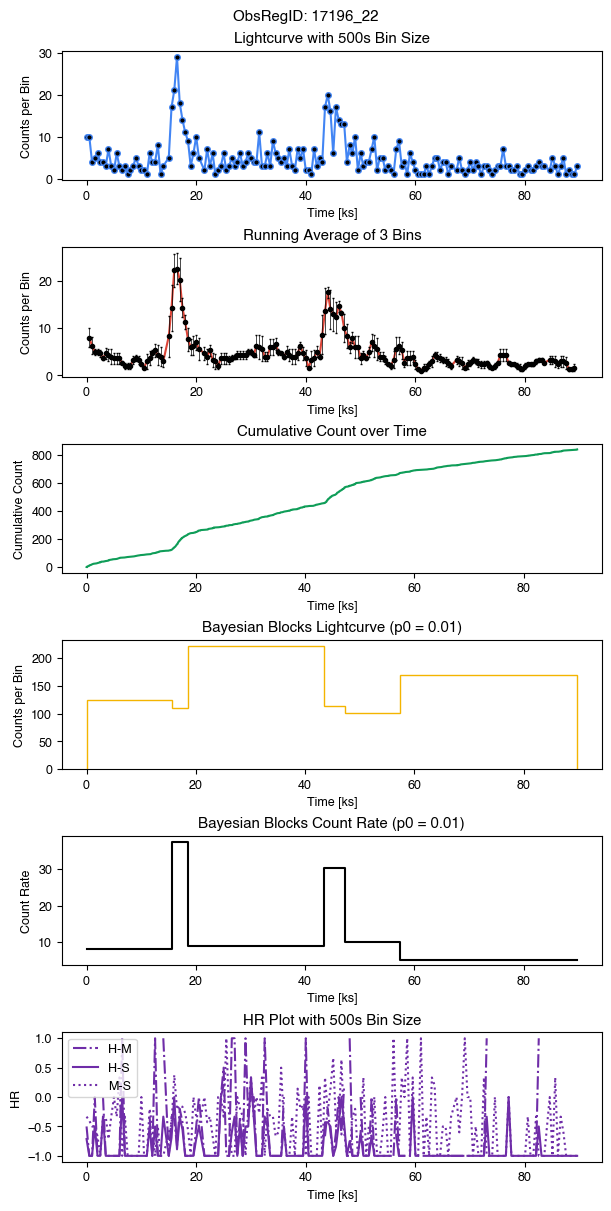

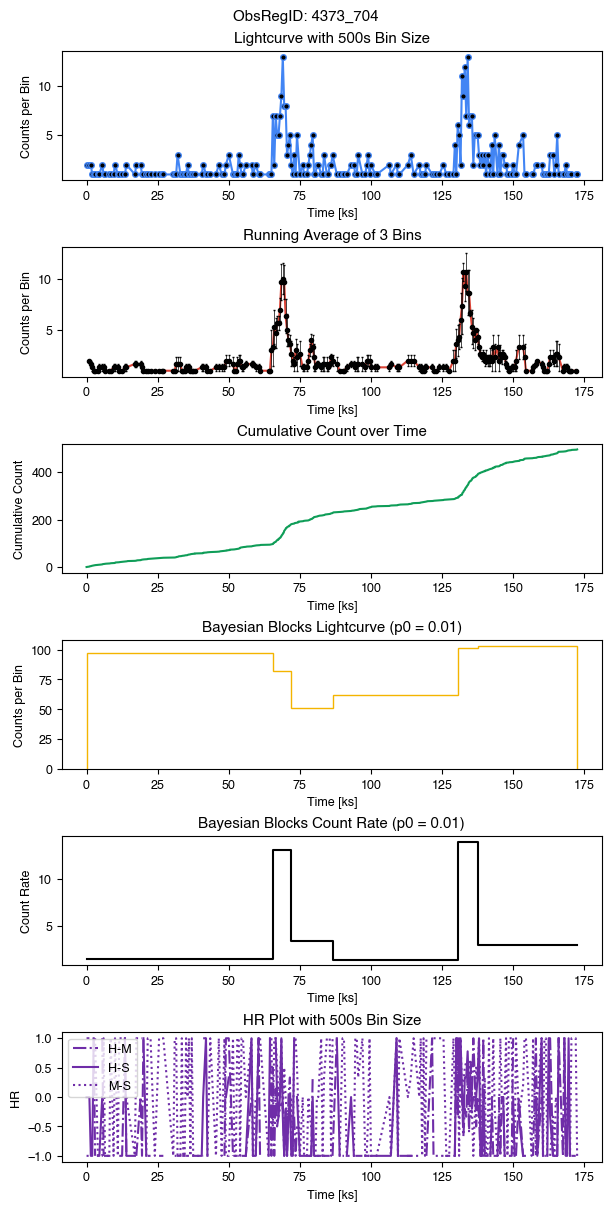

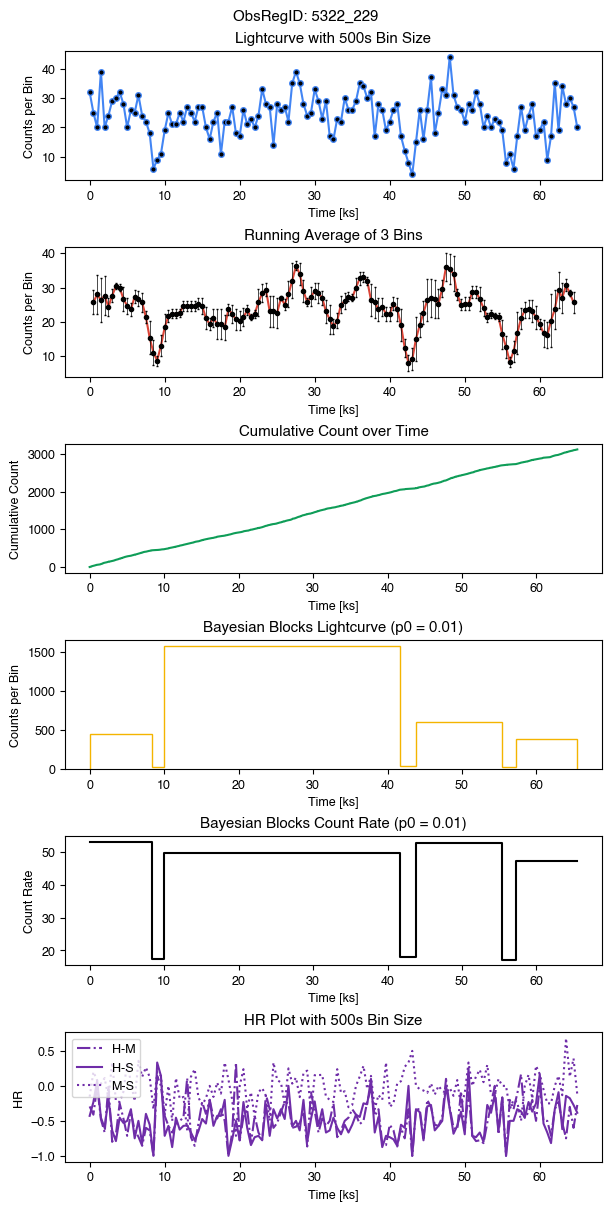

In [66]:
df_eventfiles_group_filtered = df_eventfiles_group.filter(lambda x: x.name in keep).groupby('obsreg_id')
for id_name, dfi in df_eventfiles_group_filtered:
    dfi.sort_values(by='time', inplace = True) 
    dfi.reset_index(drop=True, inplace = True)
    lightcurveplotter(dfi,id_name,500,bb_p0=0.01)